# <p style="padding:10px;background-color:#E7B10A;margin:0;color:#141E46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">BMCS2123 Natural Language Processing Assignment</p>

# <p style="padding:10px;background-color:#EFB495;margin:0;color:#213555;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Natural Language Processing for Sentiment Analysis : Unveiling Customer Voices of Shopee Reviews and Comments</p>

<p style="text-align:center; ">
<img src="https://bigblue.academy/images/image/blog/sentiment-analysis/group-153.jpg" style='width: 600px; height: 350px;'>
</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import Libraries & Packages</p>

In [1]:
# pip install nltk

In [2]:
# pip install PySastrawi

In [3]:
# pip install pycountry

In [4]:
# pip install Langdetect

In [5]:
# pip install wordcloud

In [6]:
# pip install demoji

In [7]:
# pip install contractions

In [8]:
# pip install tensorflow

In [9]:
# pip install textblob

In [10]:
import pandas as pd
import nltk
import seaborn as sns #Kenneth
import matplotlib.pyplot as plt
import string
import demoji
import contractions
import time

from langdetect import detect,detect_langs #pip install langdetect (Kenneth)
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import The Dataset</p>

In [11]:
# https://shopee.com.my/-READY-STOCK-BAJU-MELAYU-SLIM-FIT-DEWASA-DAN-BUDAK-(kain-sating)-RAYA-2024-i.310588344.24263963059?sp_atk=287c391c-faaa-41a1-82f2-7256758aae1e&xptdk=287c391c-faaa-41a1-82f2-7256758aae1e
# https://shopee.com.my/SALE-!!!!Baju-Melayu-Slimfit-dan-Regular-Warna-Cream-i.45909008.4503941744?sp_atk=8aaff726-92bd-4a36-a751-26b59408ed33&xptdk=8aaff726-92bd-4a36-a751-26b59408ed33


# Define file paths
data  = "dataset1.csv"
data2 = "dataset2.csv"

# Read CSV files into DataFrames
df1 = pd.read_csv(data)
df2 = pd.read_csv(data2, encoding='latin1')

combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df.to_csv("merged_data.csv", index=False)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [12]:
combined_df.describe()


No.      Rating
count  466.000000  466.000000
mean   217.532189    3.343348
std    133.931229    1.471642
min      1.000000    1.000000
25%    101.250000    2.000000
50%    217.500000    3.000000
75%    333.750000    5.000000
max    450.000000    5.000000

In [13]:
combined_df.head() # print the data from head

No.        Author  Rating  \
0    1       n*****n       3   
1    2       y*****i       2   
2    3  amalinadinee       2   
3    4       c*****8       5   
4    5    8kbvdmoyw9       5   

                                              Review  
0  baju kurta sampai dalam keadaan baik, tapi tak...  
1  Sizing tak accurate langsung, aku rasa macam b...  
2  Baju kurta aku dah koyak sebelum pakai, memang...  
3  Delivery laju. Kain cantik. Thanks seller. Mas...  
4  Baju selamat mendarat kain cantik dan sedap di...

In [14]:
combined_df.tail() # print the data from head

No.      Author  Rating  \
461   12     m*****4       1   
462   13   khaynurul       5   
463   14  k_w1z356vg       5   
464   15   acikmaira       1   
465   16  fvxmwlvyq7       5   

                                                Review  
461  Warna nude kita mintak warna lain yg Smpai lpa...  
462                                                NaN  
463                   tidak mengikuti saiz yg saya nak  
464                         Ukuran tak sama saiz besar  
465                                                NaN

In [15]:
combined_df[:2].isnull()

No.  Author  Rating  Review
0  False   False   False   False
1  False   False   False   False

In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No.     466 non-null    int64 
 1   Author  466 non-null    object
 2   Rating  466 non-null    int64 
 3   Review  462 non-null    object
dtypes: int64(2), object(2)
memory usage: 14.7+ KB


- Lowercase
- Stemming / Lemmatisation
- Stopword Removal
- Normalization
- Text Enrichment (POS Tagging, Augmentation)
- Noice Removal (Remove Emoji)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Transformation</p>

In [17]:
# Get the column variable
combined_df.columns

Index(['No.', 'Author', 'Rating', 'Review'], dtype='object')

In [18]:
combined_df.columns = ['No','Author','Product Rating','Product Review']

In [19]:
combined_df.head()

No        Author  Product Rating  \
0   1       n*****n               3   
1   2       y*****i               2   
2   3  amalinadinee               2   
3   4       c*****8               5   
4   5    8kbvdmoyw9               5   

                                      Product Review  
0  baju kurta sampai dalam keadaan baik, tapi tak...  
1  Sizing tak accurate langsung, aku rasa macam b...  
2  Baju kurta aku dah koyak sebelum pakai, memang...  
3  Delivery laju. Kain cantik. Thanks seller. Mas...  
4  Baju selamat mendarat kain cantik dan sedap di...

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Cleaning</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Handling Missing Value</p>

In [20]:
combined_df.isnull().any().any()

True

In [21]:
# Test if missing value exist
combined_df.isna().any()

No                False
Author            False
Product Rating    False
Product Review     True
dtype: bool


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Remove Missing Value</p>

In [22]:
# Drop rows with empty reviews
combined_df = combined_df.dropna(subset=['Product Review'])


In [23]:
missing_values = combined_df.isnull()

missing_count_per_column = missing_values.sum()

print("Missing values per column:")
print(missing_count_per_column)

if missing_values.any().any():
    print("\nThere are missing values in the data.")
else:
    print("\nThere are no missing values in the data.")


Missing values per column:
No                0
Author            0
Product Rating    0
Product Review    0
dtype: int64

There are no missing values in the data.


In [24]:
combined_df.to_csv('clean_dataset.csv', index=False)

In [25]:
combined_df.head()

No        Author  Product Rating  \
0   1       n*****n               3   
1   2       y*****i               2   
2   3  amalinadinee               2   
3   4       c*****8               5   
4   5    8kbvdmoyw9               5   

                                      Product Review  
0  baju kurta sampai dalam keadaan baik, tapi tak...  
1  Sizing tak accurate langsung, aku rasa macam b...  
2  Baju kurta aku dah koyak sebelum pakai, memang...  
3  Delivery laju. Kain cantik. Thanks seller. Mas...  
4  Baju selamat mendarat kain cantik dan sedap di...

In [26]:
combined_df.isnull().any().any() #check missing value

False

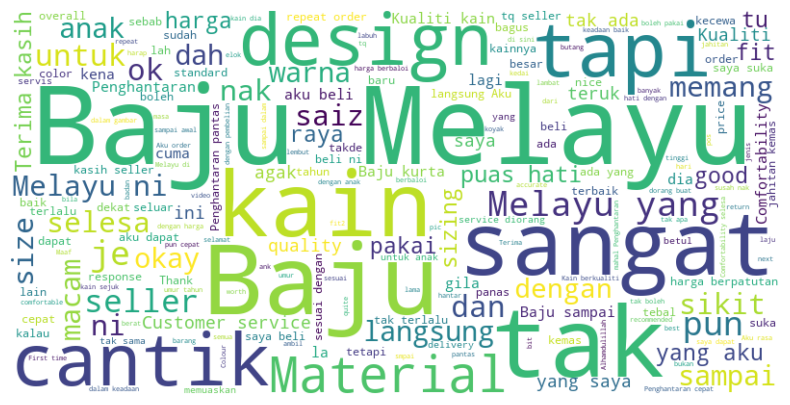

In [27]:
def clean_review(review):
  if not isinstance(review, str):
    return str(review)  # Convert float to string
  else:
    return review

cleaned_reviews = [clean_review(review) for review in combined_df['Product Review']]
reviews_text = ' '.join(cleaned_reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
combined_df

No        Author  Product Rating  \
0     1       n*****n               3   
1     2       y*****i               2   
2     3  amalinadinee               2   
3     4       c*****8               5   
4     5    8kbvdmoyw9               5   
..   ..           ...             ...   
458   9       s*****a               3   
460  11        *****n               2   
461  12       m*****4               1   
463  14    k_w1z356vg               5   
464  15     acikmaira               1   

                                        Product Review  
0    baju kurta sampai dalam keadaan baik, tapi tak...  
1    Sizing tak accurate langsung, aku rasa macam b...  
2    Baju kurta aku dah koyak sebelum pakai, memang...  
3    Delivery laju. Kain cantik. Thanks seller. Mas...  
4    Baju selamat mendarat kain cantik dan sedap di...  
..                                                 ...  
458  Pada baju ada warna merah\nCuba basuh masih x ...  
460  Colour a bit different from the picture. And m...  
461  Warna nude kita mintak warna lain yg Smpai lpa...  
463                   tidak mengikuti saiz yg saya nak  
464                         Ukuran tak sama saiz besar  

[462 rows x 4 columns]

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">EDA</p>

In [29]:
# Create a new DataFrame with only the desired columns
selected_columns = ['Product Review','Product Rating']
combined_df = combined_df[selected_columns]

# Display the new DataFrame
print(combined_df)

                                        Product Review  Product Rating
0    baju kurta sampai dalam keadaan baik, tapi tak...               3
1    Sizing tak accurate langsung, aku rasa macam b...               2
2    Baju kurta aku dah koyak sebelum pakai, memang...               2
3    Delivery laju. Kain cantik. Thanks seller. Mas...               5
4    Baju selamat mendarat kain cantik dan sedap di...               5
..                                                 ...             ...
458  Pada baju ada warna merah\nCuba basuh masih x ...               3
460  Colour a bit different from the picture. And m...               2
461  Warna nude kita mintak warna lain yg Smpai lpa...               1
463                   tidak mengikuti saiz yg saya nak               5
464                         Ukuran tak sama saiz besar               1

[462 rows x 2 columns]


In [30]:
# case folding and lowercasing
def casefolding(Review):
    Review = Review.lower()
    return Review
combined_df['LowerCaseReview'] = combined_df['Product Review'].apply(casefolding)
combined_df

Product Review  Product Rating  \
0    baju kurta sampai dalam keadaan baik, tapi tak...               3   
1    Sizing tak accurate langsung, aku rasa macam b...               2   
2    Baju kurta aku dah koyak sebelum pakai, memang...               2   
3    Delivery laju. Kain cantik. Thanks seller. Mas...               5   
4    Baju selamat mendarat kain cantik dan sedap di...               5   
..                                                 ...             ...   
458  Pada baju ada warna merah\nCuba basuh masih x ...               3   
460  Colour a bit different from the picture. And m...               2   
461  Warna nude kita mintak warna lain yg Smpai lpa...               1   
463                   tidak mengikuti saiz yg saya nak               5   
464                         Ukuran tak sama saiz besar               1   

                                       LowerCaseReview  
0    baju kurta sampai dalam keadaan baik, tapi tak...  
1    sizing tak accurate langsung, aku rasa macam b...  
2    baju kurta aku dah koyak sebelum pakai, memang...  
3    delivery laju. kain cantik. thanks seller. mas...  
4    baju selamat mendarat kain cantik dan sedap di...  
..                                                 ...  
458  pada baju ada warna merah\ncuba basuh masih x ...  
460  colour a bit different from the picture. and m...  
461  warna nude kita mintak warna lain yg smpai lpa...  
463                   tidak mengikuti saiz yg saya nak  
464                         ukuran tak sama saiz besar  

[462 rows x 3 columns]

In [31]:
remove = set(string.punctuation)

def remove_punctuation(text):
    return ' '.join(word.strip(''.join(remove)) for word in text.split())

# Apply the function to the 'Review_Lcase' column
combined_df['RemovedPuncReview'] = combined_df['LowerCaseReview'].apply(remove_punctuation)

# Display the updated DataFrame
combined_df

Product Review  Product Rating  \
0    baju kurta sampai dalam keadaan baik, tapi tak...               3   
1    Sizing tak accurate langsung, aku rasa macam b...               2   
2    Baju kurta aku dah koyak sebelum pakai, memang...               2   
3    Delivery laju. Kain cantik. Thanks seller. Mas...               5   
4    Baju selamat mendarat kain cantik dan sedap di...               5   
..                                                 ...             ...   
458  Pada baju ada warna merah\nCuba basuh masih x ...               3   
460  Colour a bit different from the picture. And m...               2   
461  Warna nude kita mintak warna lain yg Smpai lpa...               1   
463                   tidak mengikuti saiz yg saya nak               5   
464                         Ukuran tak sama saiz besar               1   

                                       LowerCaseReview  \
0    baju kurta sampai dalam keadaan baik, tapi tak...   
1    sizing tak accurate langsung, aku rasa macam b...   
2    baju kurta aku dah koyak sebelum pakai, memang...   
3    delivery laju. kain cantik. thanks seller. mas...   
4    baju selamat mendarat kain cantik dan sedap di...   
..                                                 ...   
458  pada baju ada warna merah\ncuba basuh masih x ...   
460  colour a bit different from the picture. and m...   
461  warna nude kita mintak warna lain yg smpai lpa...   
463                   tidak mengikuti saiz yg saya nak   
464                         ukuran tak sama saiz besar   

                                     RemovedPuncReview  
0    baju kurta sampai dalam keadaan baik tapi tak ...  
1    sizing tak accurate langsung aku rasa macam ba...  
2    baju kurta aku dah koyak sebelum pakai memang ...  
3    delivery laju kain cantik thanks seller masih ...  
4    baju selamat mendarat kain cantik dan sedap di...  
..                                                 ...  
458  pada baju ada warna merah cuba basuh masih x h...  
460  colour a bit different from the picture and mo...  
461  warna nude kita mintak warna lain yg smpai lpa...  
463                   tidak mengikuti saiz yg saya nak  
464                         ukuran tak sama saiz besar  

[462 rows x 4 columns]

In [36]:
#change sequence 

combined_df['RemovedSpecialCharReview'] = combined_df['RemovedSpecialCharReview'].astype(str)

combined_df['DemojiReview'] = combined_df['RemovedSpecialCharReview'].apply(lambda x: demoji.replace(x, ''))

# Display the updated DataFrame
combined_df


Product Review  Product Rating  \
0    baju kurta sampai dalam keadaan baik, tapi tak...               3   
1    Sizing tak accurate langsung, aku rasa macam b...               2   
2    Baju kurta aku dah koyak sebelum pakai, memang...               2   
3    Delivery laju. Kain cantik. Thanks seller. Mas...               5   
4    Baju selamat mendarat kain cantik dan sedap di...               5   
..                                                 ...             ...   
458  Pada baju ada warna merah\nCuba basuh masih x ...               3   
460  Colour a bit different from the picture. And m...               2   
461  Warna nude kita mintak warna lain yg Smpai lpa...               1   
463                   tidak mengikuti saiz yg saya nak               5   
464                         Ukuran tak sama saiz besar               1   

                                       LowerCaseReview  \
0    baju kurta sampai dalam keadaan baik, tapi tak...   
1    sizing tak accurate langsung, aku rasa macam b...   
2    baju kurta aku dah koyak sebelum pakai, memang...   
3    delivery laju. kain cantik. thanks seller. mas...   
4    baju selamat mendarat kain cantik dan sedap di...   
..                                                 ...   
458  pada baju ada warna merah\ncuba basuh masih x ...   
460  colour a bit different from the picture. and m...   
461  warna nude kita mintak warna lain yg smpai lpa...   
463                   tidak mengikuti saiz yg saya nak   
464                         ukuran tak sama saiz besar   

                                     RemovedPuncReview  \
0    baju kurta sampai dalam keadaan baik tapi tak ...   
1    sizing tak accurate langsung aku rasa macam ba...   
2    baju kurta aku dah koyak sebelum pakai memang ...   
3    delivery laju kain cantik thanks seller masih ...   
4    baju selamat mendarat kain cantik dan sedap di...   
..                                                 ...   
458  pada baju ada warna merah cuba basuh masih x h...   
460  colour a bit different from the picture and mo...   
461  warna nude kita mintak warna lain yg smpai lpa...   
463                   tidak mengikuti saiz yg saya nak   
464                         ukuran tak sama saiz besar   

                                       lemmatized_text  \
0    baju kurta sampai dalam ada baik tapi tak ada ...   
1    sizing tak accurate langsung aku rasa macam ba...   
2    baju kurta aku dah koyak belum pakai memang ta...   
3    delivery laju kain cantik thanks seller masih ...   
4    baju selamat darat kain cantik dan sedap di pa...   
..                                                 ...   
458  pada baju ada warna merah cuba basuh masih x h...   
460  colour a bit different from the picture and mo...   
461  warna nude kita mintak warna lain yg smpai lpa...   
463                        tidak ikut saiz yg saya nak   
464                           ukur tak sama saiz besar   

                              RemovedSpecialCharReview  \
0    baju kurta sampai dalam keadaan baik tapi tak ...   
1    sizing tak accurate langsung aku rasa macam ba...   
2    baju kurta aku dah koyak sebelum pakai memang ...   
3    delivery laju kain cantik thanks seller masih ...   
4    baju selamat mendarat kain cantik dan sedap di...   
..                                                 ...   
458  pada baju ada warna merah cuba basuh masih x h...   
460  colour a bit different from the picture and mo...   
461  warna nude kita mintak warna lain yg smpai lpa...   
463                   tidak mengikuti saiz yg saya nak   
464                         ukuran tak sama saiz besar   

                                          DemojiReview  
0    baju kurta sampai dalam keadaan baik tapi tak ...  
1    sizing tak accurate langsung aku rasa macam ba...  
2    baju kurta aku dah koyak sebelum pakai memang ...  
3    delivery laju kain cantik thanks seller masih ...  
4    baju selamat mendarat kain cantik dan sedap di...  
..                   

In [35]:
#change sequence 

import re  # Add this line to import the 're' module

# Define the function to remove special characters
def remove_special_characters(text):
    # Using regular expression to keep only alphanumeric characters and spaces
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the 'Review_Lcase' column
combined_df['RemovedSpecialCharReview'] = combined_df['RemovedPuncReview'].apply(remove_special_characters)

# Display the first few rows
combined_df.head()


Product Review  Product Rating  \
0  baju kurta sampai dalam keadaan baik, tapi tak...               3   
1  Sizing tak accurate langsung, aku rasa macam b...               2   
2  Baju kurta aku dah koyak sebelum pakai, memang...               2   
3  Delivery laju. Kain cantik. Thanks seller. Mas...               5   
4  Baju selamat mendarat kain cantik dan sedap di...               5   

                                     LowerCaseReview  \
0  baju kurta sampai dalam keadaan baik, tapi tak...   
1  sizing tak accurate langsung, aku rasa macam b...   
2  baju kurta aku dah koyak sebelum pakai, memang...   
3  delivery laju. kain cantik. thanks seller. mas...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                   RemovedPuncReview  \
0  baju kurta sampai dalam keadaan baik tapi tak ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak sebelum pakai memang ...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                     lemmatized_text  \
0  baju kurta sampai dalam ada baik tapi tak ada ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak belum pakai memang ta...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat darat kain cantik dan sedap di pa...   

                            RemovedSpecialCharReview  
0  baju kurta sampai dalam keadaan baik tapi tak ...  
1  sizing tak accurate langsung aku rasa macam ba...  
2  baju kurta aku dah koyak sebelum pakai memang ...  
3  delivery laju kain cantik thanks seller masih ...  
4  baju selamat mendarat kain cantik dan sedap di...

In [37]:
# https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/
# https://www.aasmr.org/jsms/Vol12/JSMS%20OCT%202022/Vol.12.No.05.05.pdf

# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'Review_Lcase' column
combined_df['ContractionReview'] = combined_df['DemojiReview'].apply(expand_contractions)

# Display the updated DataFrame
combined_df.head()

Product Review  Product Rating  \
0  baju kurta sampai dalam keadaan baik, tapi tak...               3   
1  Sizing tak accurate langsung, aku rasa macam b...               2   
2  Baju kurta aku dah koyak sebelum pakai, memang...               2   
3  Delivery laju. Kain cantik. Thanks seller. Mas...               5   
4  Baju selamat mendarat kain cantik dan sedap di...               5   

                                     LowerCaseReview  \
0  baju kurta sampai dalam keadaan baik, tapi tak...   
1  sizing tak accurate langsung, aku rasa macam b...   
2  baju kurta aku dah koyak sebelum pakai, memang...   
3  delivery laju. kain cantik. thanks seller. mas...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                   RemovedPuncReview  \
0  baju kurta sampai dalam keadaan baik tapi tak ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak sebelum pakai memang ...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                     lemmatized_text  \
0  baju kurta sampai dalam ada baik tapi tak ada ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak belum pakai memang ta...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat darat kain cantik dan sedap di pa...   

                            RemovedSpecialCharReview  \
0  baju kurta sampai dalam keadaan baik tapi tak ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak sebelum pakai memang ...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                        DemojiReview  \
0  baju kurta sampai dalam keadaan baik tapi tak ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak sebelum pakai memang ...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                   ContractionReview  
0  baju kurta sampai dalam keadaan baik tapi tak ...  
1  sizing tak accurate langsung aku rasa macam ba...  
2  baju kurta aku dah koyak sebelum pakai memang ...  
3  delivery laju kain cantik thanks seller masih ...  
4  baju selamat mendarat kain cantik dan sedap di...

In [38]:
def expand_contractions(text):
    # Define common contractions and their expanded forms
    contractions = {
        "aku'": "aku",
        "saya'": "saya",
        "kau'": "kau",
        "dia'": "dia",
        "boleh'": "boleh",
        "baik '": "terbaikkkkkk"
        # Add more contractions as needed
    }
    
    # Replace contractions with their expanded forms
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    
    return text

# Test the function
text = "meterial baik barang sampai dalam ada baik seller pun baik ada rezeki akan repeat order lagi terima kasih seller terbaikkk terbaikkkkkk terbaikkk terbaikkkkkk"
expanded_text = expand_contractions(text)
print(expanded_text)


meterial baik barang sampai dalam ada baik seller pun baik ada rezeki akan repeat order lagi terima kasih seller terbaikkk terbaikkkkkk terbaikkk terbaikkkkkk


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Tokenization</p>

In [39]:
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
combined_df['ContractionReview'] = combined_df['ContractionReview'].apply(word_tokenize_wrapper)
combined_df.head()



Product Review  Product Rating  \
0  baju kurta sampai dalam keadaan baik, tapi tak...               3   
1  Sizing tak accurate langsung, aku rasa macam b...               2   
2  Baju kurta aku dah koyak sebelum pakai, memang...               2   
3  Delivery laju. Kain cantik. Thanks seller. Mas...               5   
4  Baju selamat mendarat kain cantik dan sedap di...               5   

                                     LowerCaseReview  \
0  baju kurta sampai dalam keadaan baik, tapi tak...   
1  sizing tak accurate langsung, aku rasa macam b...   
2  baju kurta aku dah koyak sebelum pakai, memang...   
3  delivery laju. kain cantik. thanks seller. mas...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                   RemovedPuncReview  \
0  baju kurta sampai dalam keadaan baik tapi tak ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak sebelum pakai memang ...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                     lemmatized_text  \
0  baju kurta sampai dalam ada baik tapi tak ada ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak belum pakai memang ta...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat darat kain cantik dan sedap di pa...   

                            RemovedSpecialCharReview  \
0  baju kurta sampai dalam keadaan baik tapi tak ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak sebelum pakai memang ...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                        DemojiReview  \
0  baju kurta sampai dalam keadaan baik tapi tak ...   
1  sizing tak accurate langsung aku rasa macam ba...   
2  baju kurta aku dah koyak sebelum pakai memang ...   
3  delivery laju kain cantik thanks seller masih ...   
4  baju selamat mendarat kain cantik dan sedap di...   

                                   ContractionReview  
0  [baju, kurta, sampai, dalam, keadaan, baik, ta...  
1  [sizing, tak, accurate, langsung, aku, rasa, m...  
2  [baju, kurta, aku, dah, koyak, sebelum, pakai,...  
3  [delivery, laju, kain, cantik, thanks, seller,...  
4  [baju, selamat, mendarat, kain, cantik, dan, s...

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Lemmatization</p>

In [40]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
#nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_tokens(tokens):
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to each tokenized list in 'ContractionReview' column
combined_df['ContractionReview'] = combined_df['ContractionReview'].apply(lemmatize_tokens)

# Reconstruct sentences from lemmatized tokens
combined_df['lemma_review'] = combined_df['ContractionReview'].apply(lambda tokens: ' '.join(tokens))

combined_df[['Product Review','ContractionReview','lemma_review']].head(20)

Product Review  \
0   baju kurta sampai dalam keadaan baik, tapi tak...   
1   Sizing tak accurate langsung, aku rasa macam b...   
2   Baju kurta aku dah koyak sebelum pakai, memang...   
3   Delivery laju. Kain cantik. Thanks seller. Mas...   
4   Baju selamat mendarat kain cantik dan sedap di...   
5   Baju cantik. Pos dalam 4hri Kualiti okay la. T...   
6   Selamat sampai thank you ya saiz ukuran sama s...   
7   Bungkusan bagus dan baik. Barang sampai dengan...   
8   Baju size 3-4 ok semua cantik jahitan kemas. \...   
9   Perfect..\nPenghantaran sangat cepat.\nKualiti...   
10  Meterial baik, barang sampai dalam keadaan bai...   
11  Baju cantik kain ok sedap pakai,penhantaran ce...   
12  Tq barang sudah sampai...\n\nAnak2 suka kain p...   
13  Colour cantik wey. Susah gilos nak cari colour...   
14  Allhamdulilah semua ok kain pun cantik warna p...   
15  At first seller contact to say takde colour cr...   
16  Kain cantik sangat. fit fit size anak. Thank s...   
17  Baju senget. Ukuran tak sama  Poslaju lambat h...   
18  Received item in good conditions. Quality is o...   
19  Penghantaran pantas. Baju sesuai muat ikut sai...   

                                    ContractionReview  \
0   [baju, kurta, sampai, dalam, keadaan, baik, ta...   
1   [sizing, tak, accurate, langsung, aku, rasa, m...   
2   [baju, kurta, aku, dah, koyak, sebelum, pakai,...   
3   [delivery, laju, kain, cantik, thanks, seller,...   
4   [baju, selamat, mendarat, kain, cantik, dan, s...   
5   [baju, cantik, po, dalam, 4hri, kualiti, okay,...   
6   [selamat, sampai, thank, you, ya, saiz, ukuran...   
7   [bungkusan, bagus, dan, baik, barang, sampai, ...   
8   [baju, size, 34, ok, semua, cantik, jahitan, k...   
9   [perfect, penghantaran, sangat, cepat, kualiti...   
10  [meterial, baik, barang, sampai, dalam, keadaa...   
11  [baju, cantik, kain, ok, sedap, pakaipenhantar...   
12  [tq, barang, sudah, sampai, anak2, suka, kain,...   
13  [colour, cantik, wey, susah, gilos, nak, cari,...   
14  [allhamdulilah, semua, ok, kain, pun, cantik, ...   
15  [at, first, seller, contact, to, say, takde, c...   
16  [kain, cantik, sangat, fit, fit, size, anak, t...   
17  [baju, senget, ukuran, tak, sama, poslaju, lam...   
18  [received, item, in, good, condition, quality,...   
19  [penghantaran, pantas, baju, sesuai, muat, iku...   

                                         lemma_review  
0   baju kurta sampai dalam keadaan baik tapi tak ...  
1   sizing tak accurate langsung aku rasa macam ba...  
2   baju kurta aku dah koyak sebelum pakai memang ...  
3   delivery laju kain cantik thanks seller masih ...  
4   baju selamat mendarat kain cantik dan sedap di...  
5   baju cantik po dalam 4hri kualiti okay la than...  
6   selamat sampai thank you ya saiz ukuran sama s...  
7   bungkusan bagus dan baik barang sampai dengan ...  
8   baju size 34 ok semua cantik jahitan kemas baj...  
9   perfect penghantaran sangat cepat kualiti kain...  
10  meterial baik barang sampai dalam keadaan baik...  
11  baju cantik kain ok sedap pakaipenhantaran cep...  
12  tq barang sudah sampai anak2 suka kain pun bes...  
13  colour cantik wey susah gilos nak cari colour ...  
14  allhamdulilah semua ok kain pun cantik warna p...  
15  at first seller contact to say takde colour cr...  
16  kain cantik sangat fit fit size anak thank sel...  
17  baju senget ukuran tak sama poslaju lambat han...  
18  received item in good condition quality is ok ...  
19  penghantaran pantas baju sesuai muat ikut saiz...

In [41]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create Stemmer object
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Perform lemmatization on each sentence in the 'text' column
combined_df['lemmatized_text'] = combined_df['Product Review'].apply(lambda x: stemmer.stem(x))

# Display the original and lemmatized text
print(combined_df[['Product Review', 'lemmatized_text']])


                                        Product Review  \
0    baju kurta sampai dalam keadaan baik, tapi tak...   
1    Sizing tak accurate langsung, aku rasa macam b...   
2    Baju kurta aku dah koyak sebelum pakai, memang...   
3    Delivery laju. Kain cantik. Thanks seller. Mas...   
4    Baju selamat mendarat kain cantik dan sedap di...   
..                                                 ...   
458  Pada baju ada warna merah\nCuba basuh masih x ...   
460  Colour a bit different from the picture. And m...   
461  Warna nude kita mintak warna lain yg Smpai lpa...   
463                   tidak mengikuti saiz yg saya nak   
464                         Ukuran tak sama saiz besar   

                                       lemmatized_text  
0    baju kurta sampai dalam ada baik tapi tak ada ...  
1    sizing tak accurate langsung aku rasa macam ba...  
2    baju kurta aku dah koyak belum pakai memang ta...  
3    delivery laju kain cantik thanks seller masih ...  
4    baju selamat 

In [42]:
print(combined_df['ContractionReview'][10])

['meterial', 'baik', 'barang', 'sampai', 'dalam', 'keadaan', 'baik', 'seller', 'pun', 'baik', 'ada', 'rezeki', 'akan', 'repeat', 'order', 'lagi', 'terima', 'kasih', 'seller', 'terbaikkk', 'terbaikkkkkk', 'terbaikkk', 'terbaikkkkkk']


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Pos-Tagging</p>

- either dictionary (Rule-Based Tagging) or probability (HMM)

In [43]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download NLTK resources
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')


In [44]:
# Function to perform POS tagging on a list of words
def pos_tagging(words):
    return pos_tag(words)

# Apply POS tagging to the 'ContrationComment' column
combined_df['POS_Tags'] = combined_df['ContractionReview'].apply(
    lambda x: pos_tagging(word_tokenize(' '.join(x)))
    if isinstance(x, list)
    else pos_tagging(word_tokenize(x))
)

# Display the DataFrame with POS tags
print(combined_df[['ContractionReview', 'POS_Tags']])


                                     ContractionReview  \
0    [baju, kurta, sampai, dalam, keadaan, baik, ta...   
1    [sizing, tak, accurate, langsung, aku, rasa, m...   
2    [baju, kurta, aku, dah, koyak, sebelum, pakai,...   
3    [delivery, laju, kain, cantik, thanks, seller,...   
4    [baju, selamat, mendarat, kain, cantik, dan, s...   
..                                                 ...   
458  [pada, baju, ada, warna, merah, cuba, basuh, m...   
460  [colour, a, bit, different, from, the, picture...   
461  [warna, nude, kita, mintak, warna, lain, yg, s...   
463            [tidak, mengikuti, saiz, yg, saya, nak]   
464                   [ukuran, tak, sama, saiz, besar]   

                                              POS_Tags  
0    [(baju, NN), (kurta, NN), (sampai, NN), (dalam...  
1    [(sizing, VBG), (tak, NN), (accurate, NN), (la...  
2    [(baju, NN), (kurta, NN), (aku, NN), (dah, NN)...  
3    [(delivery, NN), (laju, NN), (kain, NN), (cant...  
4    [(baju, NN), 

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Stemming</p>

In [45]:
def stemming(ContractionReview):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in ContractionReview:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
combined_df['ContractionReview'] = combined_df['ContractionReview'].apply(stemming)

combined_df['ContractionReview']

baju kurta sampai dalam ada baik tapi tak ada yang standout
sizing tak accurate langsung aku rasa macam baju sekolah zaman rendah
baju kurta aku dah koyak belum pakai memang tak quality langsung
delivery laju kain cantik thanks seller masih tunggu lagi 2pasang baju untuk smpai po out lambat pulak dari yang ini
baju selamat darat kain cantik dan sedap di pakai seller peramahabg jt pun laju buat keja
baju cantik po dalam 4hri alit okay la thanks seller
selamat sampai thank you ya saiz ukur sama seperti dalam carta ukur
bungkus bagus dan baik barang sampai dengan selamat tiada kerosakan dan bocor plastik yang di balut video tiada kait kain baik dan lembut
baju size 34 ok semua cantik jahit kemas baju size 12 jahit kemas tapi ada sikit kotor karat belakang baju skrg cuba untuk hilang kesan karat tu overall harga dan quality reasonable
perfect hantar sangat cepat alit kain pun best anak 1 tahun 11 bulan amik size 12 fit seller respond pun cepat
meterial baik barang sampai dalam ada baik sel

tq seller baju cepat sampai tetapi kain easaya penuh tak nipis tak tebal sangat
hantar boleh tahan lama juga sebab guna jt on time tu jt damansara ada problem saiz beli ikut chart ja memang mantap
seller ok recomended sangatbarang cantik delivery cepat sorry video tak ada kena kena
materialbagus tebal lambat pengeposan6 hari baru seller po out itu pun lambat betul response naik geram dibuatnyanasib baju cantik tetapi koyak sikit kat baju itujahit sendiri sebab majlis pun sudah dekatharap seller response cepat bila kita ask
comfortabilitynice materialgood semua okay anak pun suka yang penting selesa
materialokay comfortabilityokay kain okay standard kain baju melayu warna cantikk baju big sikit sebab anak 1tahun 1 bulan ambil saiz 12 tahun dekat baju saiz 2 tapi okay la boleh pakai lama thank you seller
comfortabilitybaju raya materialhelok maaf pic tiada kena kena baju cantik sangat kain helok sesuai untuk anak2 seluar macam besar sikit tq seller saya suka
baju dah sampai puas hati siz

baju tak rupa dalam gambar quality teruk harga very over service sangat buruk
size baju tak kena kain murah service teruk not worth it dengan harga ini tak recommend
pesan tak sampai baju tak selesa price mahal service buruk gila jangan buy di sini
baju melayu look stylish but the fabric quality disappoints hantar wa on time but not worth the price
the design is nice but the sizing is off kain agak nipis not worth the money spent
baju cantik but the harga is too high the alit kain is just average nothing special
servis hantar wa good but baju arrived with defect kain kasar not satisfied with the purchase
the design is trendy but the sizing is inconsistent alit kain is acceptable for the price paid
baju melayu look good but the kain is too thin harga ok but not the best value
baju sampai in good condition but the design is too simple alit kain is just average
ok la baju ni the design is standard alit kain is acceptable harga berbaloi
alit kain ok je the design is simple and not too flas

hantar agak pantas baju melayu sampai dalam ada baik thank you
baju melayu yang saya dapat ni look exactly macam dalam gambar online no surprise so i am content
kain baju melayu sangat comfortable tapi maybe boleh improve sikit on corak and warna
harga baju melayu di sini saing and banyak pilih warna
saya beli baju melayu ni for raya and it ha a traditional touch suka
kain tak terlalu tebal sesuai for hot weather overall quite muas
baju melayu yang saya beli sesuai dengan tema event yang saya hadir good match
customer service baik they helped dengan tanya saya tentang sizing terima kasih
the sizing chart orang quite accurate so baju melayu yang saya dapat fit nicely
kain baju melayu ni tak mudah kedut which is a plus point for me
harga memang patut for the quality of baju melayu yang saya dapat
saya suka dengan simplicity of baju melayu design casual and comfortable
baju melayu yang saya beli ni versatile boleh pakai untuk pelbagai occasion
the color option for baju melayu di sini quit

harga baju melayu memang patut untuk alit yang beri
saya suka simplicity of baju melayu design classic and elegant
baju melayu yang saya beli ni sangat versatile boleh pakai untuk pelbagai occasion
color option for baju melayu di sini sangat extensive banyak pilih yang tarik
kain baju melayu ni senang nak maintain tak perlu peningpening nak jaga
design baju melayu ni timeless so boleh pakai for year to come
customer service response time sangat cepat and sangat helpful
baju melayu yang saya beli ni memang ada wow factor i feel confident wearing it
the website userfriendly and checkout process sangat mudah
baju melayu yang saya beli ni sangat sesuai dengan tema event yang saya hadir
harga yang bayar betulbetul worth it value for money
baju melayu ni tak hanya nampak cantik tapi alit kain memang baik
saya beli baju melayu untuk raya and it exceeded my expectation
the color of baju melayu ni sangat vibrant memang nampak standout
baju melayu ni sangat ontrend i feel fashionable wearing it


0      baju kurta sampai dalam ada baik tapi tak ada ...
1      sizing tak accurate langsung aku rasa macam ba...
2      baju kurta aku dah koyak belum pakai memang ta...
3      delivery laju kain cantik thanks seller masih ...
4      baju selamat darat kain cantik dan sedap di pa...
                             ...                        
458    pada baju ada warna merah cuba basuh masih x h...
460    colour a bit different from the picture and mo...
461    warna nude kita mintak warna lain yg smpai lpa...
463                          tidak ikut saiz yg saya nak
464                             ukur tak sama saiz besar
Name: ContractionReview, Length: 462, dtype: object

In [46]:
combined_df

Product Review  Product Rating  \
0    baju kurta sampai dalam keadaan baik, tapi tak...               3   
1    Sizing tak accurate langsung, aku rasa macam b...               2   
2    Baju kurta aku dah koyak sebelum pakai, memang...               2   
3    Delivery laju. Kain cantik. Thanks seller. Mas...               5   
4    Baju selamat mendarat kain cantik dan sedap di...               5   
..                                                 ...             ...   
458  Pada baju ada warna merah\nCuba basuh masih x ...               3   
460  Colour a bit different from the picture. And m...               2   
461  Warna nude kita mintak warna lain yg Smpai lpa...               1   
463                   tidak mengikuti saiz yg saya nak               5   
464                         Ukuran tak sama saiz besar               1   

                                       LowerCaseReview  \
0    baju kurta sampai dalam keadaan baik, tapi tak...   
1    sizing tak accurate langsung, aku rasa macam b...   
2    baju kurta aku dah koyak sebelum pakai, memang...   
3    delivery laju. kain cantik. thanks seller. mas...   
4    baju selamat mendarat kain cantik dan sedap di...   
..                                                 ...   
458  pada baju ada warna merah\ncuba basuh masih x ...   
460  colour a bit different from the picture. and m...   
461  warna nude kita mintak warna lain yg smpai lpa...   
463                   tidak mengikuti saiz yg saya nak   
464                         ukuran tak sama saiz besar   

                                     RemovedPuncReview  \
0    baju kurta sampai dalam keadaan baik tapi tak ...   
1    sizing tak accurate langsung aku rasa macam ba...   
2    baju kurta aku dah koyak sebelum pakai memang ...   
3    delivery laju kain cantik thanks seller masih ...   
4    baju selamat mendarat kain cantik dan sedap di...   
..                                                 ...   
458  pada baju ada warna merah cuba basuh masih x h...   
460  colour a bit different from the picture and mo...   
461  warna nude kita mintak warna lain yg smpai lpa...   
463                   tidak mengikuti saiz yg saya nak   
464                         ukuran tak sama saiz besar   

                                       lemmatized_text  \
0    baju kurta sampai dalam ada baik tapi tak ada ...   
1    sizing tak accurate langsung aku rasa macam ba...   
2    baju kurta aku dah koyak belum pakai memang ta...   
3    delivery laju kain cantik thanks seller masih ...   
4    baju selamat darat kain cantik dan sedap di pa...   
..                                                 ...   
458  pada baju ada warna merah cuba basuh masih x h...   
460  colour a bit different from the picture and mo...   
461  warna nude kita mintak warna lain yg smpai lpa...   
463                        tidak ikut saiz yg saya nak   
464                           ukur tak sama saiz besar   

                              RemovedSpecialCharReview  \
0    baju kurta sampai dalam keadaan baik tapi tak ...   
1    sizing tak accurate langsung aku rasa macam ba...   
2    baju kurta aku dah koyak sebelum pakai memang ...   
3    delivery laju kain cantik thanks seller masih ...   
4    baju selamat mendarat kain cantik dan sedap di...   
..                                                 ...   
458  pada baju ada warna merah cuba basuh masih x h...   
460  colour a bit different from the picture and mo...   
461  warna nude kita mintak warna lain yg smpai lpa...   
463                   tidak mengikuti saiz yg saya nak   
464                         ukuran tak sama saiz besar   

                                          DemojiReview  \
0    baju kurta sampai dalam keadaan baik tapi tak ...   
1    sizing tak accurate langsung aku rasa macam ba...   
2    baju kurta aku dah koyak sebelum pakai memang ...   
3    delivery laju kain cantik thanks seller masih ...   
4    baju selamat mendarat kain cantik dan sedap di...   
..             

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classify Contravtion Comments into 3 Categories</p>

In [47]:
# Function to map ratings to sentiments
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'  # Handle any other cases if needed

# Apply mapping to create 'Sentiment_Rating' column
combined_df['Sentiment_Rating'] = combined_df['Product Rating'].apply(map_sentiment)

# Display the DataFrame with the new 'Sentiment_Rating' column
print(combined_df[['ContractionReview','Product Rating', 'Sentiment_Rating']])

                                     ContractionReview  Product Rating  \
0    baju kurta sampai dalam ada baik tapi tak ada ...               3   
1    sizing tak accurate langsung aku rasa macam ba...               2   
2    baju kurta aku dah koyak belum pakai memang ta...               2   
3    delivery laju kain cantik thanks seller masih ...               5   
4    baju selamat darat kain cantik dan sedap di pa...               5   
..                                                 ...             ...   
458  pada baju ada warna merah cuba basuh masih x h...               3   
460  colour a bit different from the picture and mo...               2   
461  warna nude kita mintak warna lain yg smpai lpa...               1   
463                        tidak ikut saiz yg saya nak               5   
464                           ukur tak sama saiz besar               1   

    Sentiment_Rating  
0            Neutral  
1           Negative  
2           Negative  
3           Positiv

In [48]:
# Count the number of reviews for each sentiment for 'Contraction_Review'
sentiment_counts_Rating = combined_df['Sentiment_Rating'].value_counts()

# Display the counts for 'Contraction_Review'
print("Sentiment Counts for Contration_Review_Rating:")
print(sentiment_counts_Rating)


Sentiment Counts for Contration_Review_Rating:
Positive    199
Negative    149
Neutral     114
Name: Sentiment_Rating, dtype: int64


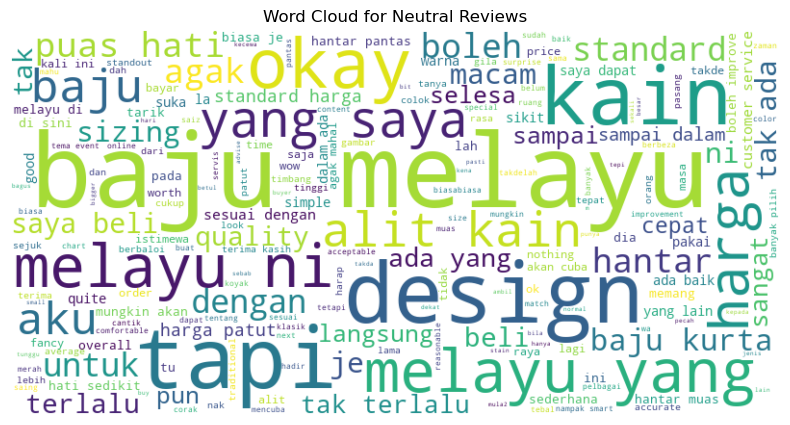

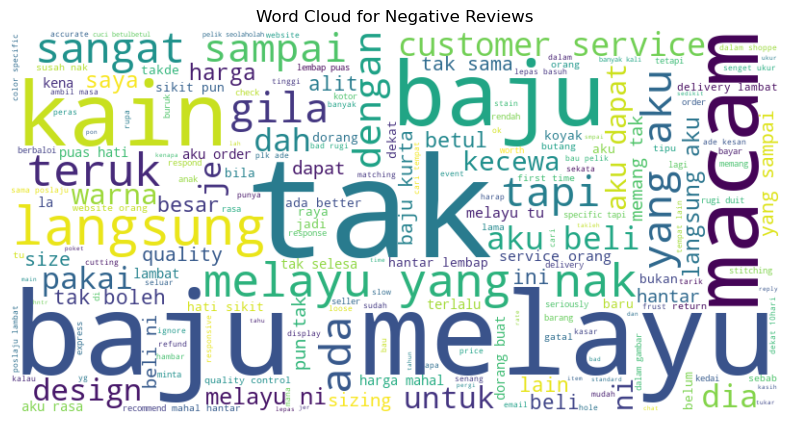

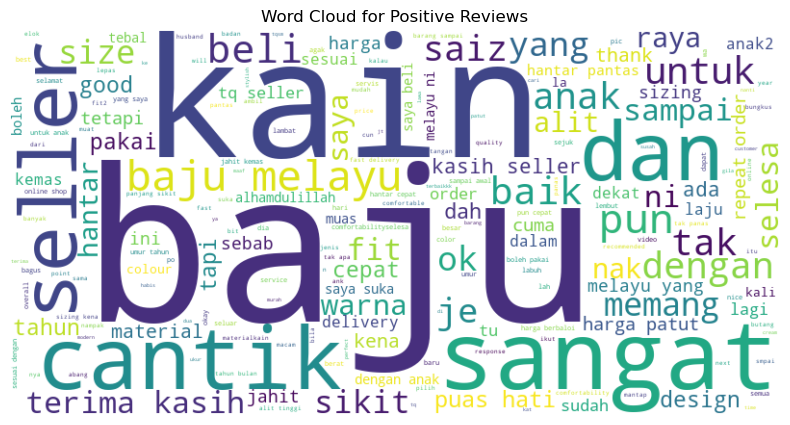

In [49]:
# Function to generate and display word cloud for a specific sentiment category
def generate_word_cloud(sentiment_category):
    # Filter the DataFrame for the specified sentiment category
    filtered_data = combined_df[combined_df['Sentiment_Rating'] == sentiment_category]

    # Concatenate all reviews in the filtered DataFrame
    text = ' '.join(filtered_data['ContractionReview'])

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_category} Reviews')
    plt.show()

# Generate word clouds for each sentiment category
sentiment_categories = combined_df['Sentiment_Rating'].unique()
for category in sentiment_categories:
    generate_word_cloud(category)


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Save as CSV File</p>

In [50]:
# Create a DataFrame with only the desired columns
selected_columns = ['ContractionReview', 'Sentiment_Rating']
selected_data = combined_df[selected_columns]

# Save the selected columns to a CSV file
selected_data.to_csv('Contraction Review & Sentiment Rating.csv', index=False)

# Display a message indicating that the CSV file has been created
print("Selected columns saved to Contraction Review & Sentiment Rating.csv")


Selected columns saved to Contraction Review & Sentiment Rating.csv


In [90]:
finalData = pd.read_csv('Contraction Review & Sentiment Rating.csv', encoding='latin1')
finalData.head()

ContractionReview Sentiment_Rating
0  baju kurta sampai dalam ada baik tapi tak ada ...          Neutral
1  sizing tak accurate langsung aku rasa macam ba...         Negative
2  baju kurta aku dah koyak belum pakai memang ta...         Negative
3  delivery laju kain cantik thanks seller masih ...         Positive
4  baju selamat darat kain cantik dan sedap di pa...         Positive

In [91]:
finalData.isnull().any().any()

False

In [92]:
# Save the selected columns to a CSV file
finalData.to_csv('Contraction Review & Sentiment Rating.csv', index=False)



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Feature Engineering </p>

In [93]:
finalData.columns

Index(['ContractionReview', 'Sentiment_Rating'], dtype='object')

In [94]:
finalData

ContractionReview Sentiment_Rating
0    baju kurta sampai dalam ada baik tapi tak ada ...          Neutral
1    sizing tak accurate langsung aku rasa macam ba...         Negative
2    baju kurta aku dah koyak belum pakai memang ta...         Negative
3    delivery laju kain cantik thanks seller masih ...         Positive
4    baju selamat darat kain cantik dan sedap di pa...         Positive
..                                                 ...              ...
457  pada baju ada warna merah cuba basuh masih x h...          Neutral
458  colour a bit different from the picture and mo...         Negative
459  warna nude kita mintak warna lain yg smpai lpa...         Negative
460                        tidak ikut saiz yg saya nak         Positive
461                           ukur tak sama saiz besar         Negative

[462 rows x 2 columns]

In [95]:
finalData.dropna(subset=['ContractionReview', 'Sentiment_Rating'], inplace=True)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finalData['ContractionReview'], finalData['Sentiment_Rating'], test_size=0.2, random_state=42)


# Print the shapes of training and testing sets
print("Number of samples in Training Set:", len(X_train))
print("Number of samples in Testing Set:", len(X_test))


Number of samples in Training Set: 369
Number of samples in Testing Set: 93


In [97]:
# Tokenize the text data
tokenized_data_train = X_train.apply(lambda x: word_tokenize(x.lower()))
tokenized_data_test = X_test.apply(lambda x: word_tokenize(x.lower()))

## TF-IDF

In [59]:
from nltk.tokenize import word_tokenize

#convert it into tf-idf 
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your dataset size

x_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
x_test_tfidf = tfidf_vectorizer.transform(X_test)

print(x_train_tfidf)
print('===================')
print(x_test_tfidf)


  (0, 488)	0.30341859948245314
  (0, 874)	0.46713698111871077
  (0, 862)	0.19390348688636624
  (0, 322)	0.3699880058810949
  (0, 247)	0.3583218558562481
  (0, 244)	0.2843119166158589
  (0, 586)	0.25581764154493586
  (0, 115)	0.2611728806186322
  (0, 46)	0.25198305446096636
  (0, 991)	0.22963074059399013
  (0, 558)	0.1932084117850174
  (0, 93)	0.1370894703499708
  (1, 437)	0.2798303666672143
  (1, 850)	0.3930465347181125
  (1, 817)	0.3930465347181125
  (1, 226)	0.2159101916749897
  (1, 711)	0.17709013810941118
  (1, 147)	0.2853283672910604
  (1, 873)	0.17116199868028106
  (1, 167)	0.19223438179755903
  (1, 733)	0.2616525574136297
  (1, 936)	0.24153037485623274
  (1, 247)	0.2285900003047282
  (1, 244)	0.3627513088787425
  (1, 115)	0.16661419861631602
  :	:
  (368, 612)	0.10019678615177934
  (368, 403)	0.12965552565884142
  (368, 390)	0.30630512005016897
  (368, 912)	0.1365351164633841
  (368, 845)	0.12078619052181912
  (368, 752)	0.08849699336581508
  (368, 132)	0.1276657813263618
  (368

## ELMo 

In [85]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd

# Load pre-trained ELMo model
elmo = hub.load("https://tfhub.dev/google/elmo/3")


# Assuming your dataset has a column named 'text' containing text data
sentences =finalData['ContractionReview'].tolist()

# Generate ELMo embeddings
embeddings = elmo.signatures["default"](tf.constant(sentences))["elmo"]


Shape of embeddings for the first sentence: (68, 1024)


In [89]:
X_elmo = np.array(embeddings)

x_train_elmo, x_test_elmo, y_train_elmo, y_test_elmo = train_test_split(X_elmo, finalData['Sentiment_Rating'].values, test_size=0.2, random_state=42)


## Word2Vec

In [60]:
from gensim.models import Word2Vec


# Train Word2Vec model on tokenized data
word2vec_model_train = Word2Vec(sentences=tokenized_data_train, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model_test  = Word2Vec(sentences=tokenized_data_test, vector_size=100, window=5, min_count=1, workers=4)

x_train_w2v = []
for doc_tokens in tokenized_data_train:
    doc_vector = sum(word2vec_model_train.wv[token] for token in doc_tokens) / len(doc_tokens)
    x_train_w2v.append(doc_vector)

x_test_w2v = []
for doc_tokens in tokenized_data_test:
    doc_vector = sum(word2vec_model_test.wv[token] for token in doc_tokens) / len(doc_tokens)
    x_test_w2v.append(doc_vector)

    
print(x_train_w2v)
print('===================')
print(x_test_w2v)


[array([-0.00566761,  0.02984873,  0.00915378, -0.00038235,  0.01027718,
       -0.06012444,  0.02099907,  0.06858573, -0.03397955, -0.01933186,
       -0.01911397, -0.0486642 ,  0.00113413,  0.0212936 ,  0.00672189,
       -0.02375173,  0.01217576, -0.04354025, -0.0050548 , -0.07896184,
        0.03153791,  0.01893081,  0.01379635, -0.01352734, -0.01277744,
        0.01638626, -0.03306405, -0.01480778, -0.02609131,  0.00876318,
        0.0372131 ,  0.0038689 ,  0.02034857, -0.02893094, -0.02206761,
        0.0609507 ,  0.00365929, -0.03383154, -0.03005982, -0.06150895,
        0.00243026, -0.03714068, -0.01453669,  0.0020049 ,  0.03293388,
       -0.00957672, -0.02755669, -0.01433708,  0.02294873,  0.00778777,
        0.01906017, -0.03292985,  0.00335346,  0.00299095, -0.01345012,
        0.01860064,  0.01019851,  0.00565823, -0.03205937,  0.01217857,
        0.00960622, -0.00526014, -0.00887287, -0.00727425, -0.03008825,
        0.03974798,  0.01018426,  0.02731949, -0.05255824,  0.0

## GloVe

In [61]:
#paste in console
#python -m spacy download en_core_web_md

In [62]:
import spacy
import numpy as np

# Load pre-trained GloVe vectors using spaCy
nlp = spacy.load('en_core_web_md')  # Assuming you have successfully downloaded the model

x_train_glo = []
for text in tokenized_data_train:
    doc = nlp(' '.join(text))  # Concatenate tokens into a single string
    doc_vector = np.mean([token.vector for token in doc], axis=0)
    x_train_glo.append(doc_vector)

x_test_glo = []
for text in tokenized_data_test:
    doc = nlp(' '.join(text))
    doc_vector = np.mean([token.vector for token in doc], axis=0)
    x_test_glo.append(doc_vector)

    
    
print(x_train_glo)
print('===========================')
print(x_test_glo)

[array([-8.7082261e-01,  2.3249042e+00,  1.0342494e-02, -8.5894161e-01,
       -1.8283491e+00, -1.2394273e+00, -1.9300967e+00, -3.6161995e-01,
       -2.8102777e+00, -1.5295566e+00, -6.0207564e-01,  1.6437491e+00,
       -2.3332992e+00,  1.1166375e+00,  1.1458017e+00, -1.4559332e+00,
        6.7828494e-01,  1.9509559e+00,  2.2375784e+00,  1.1234192e+00,
       -1.1255413e-01,  3.2572332e-01, -3.6076777e+00,  8.6987686e-01,
        1.4963740e-01, -6.6372304e+00, -1.2875830e+00, -5.6233585e-01,
       -1.7061182e+00, -1.1307367e+00, -1.8973833e+00, -9.8968506e-01,
       -1.2790500e+00, -3.0254412e+00,  5.0403752e+00,  1.3976684e+00,
       -1.1289867e+00,  1.2661660e+00, -1.4212831e+00,  5.7573503e-01,
       -7.8942847e-01, -3.6065581e+00,  7.9586428e-01,  7.6072091e-01,
        2.0553210e+00,  6.7598754e-01, -4.0315418e+00, -4.5098838e-01,
       -4.5003924e-01,  6.5649748e-03, -3.0787201e+00, -1.2328917e+00,
       -1.0114002e-01,  1.8553166e-01,  1.8754993e-01, -1.0088600e+00,
     


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Model Training, Testing and Evaluation</p>


# <p style="padding:10px;background-color:gold;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:300">Supervised Learning</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Support Vector Machine (SVM)</p>

## find the best parameters

In [ ]:
x_train_elmo

In [100]:
#find the best parameter using Grid Search

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001, 0.0001]
}

# Instantiate SVM model
svm = SVC()

# Instantiate GridSearchCV
grid_search_tfidf_temp = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search_w2v_temp = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_w2v = grid_search_w2v_temp.fit(x_train_w2v, y_train)
grid_search_glo = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_w2v = grid_search_w2v.best_params_
best_params_glo = grid_search_glo.best_params_

print("Best Parameters for TD-IDF  :", best_params_tfidf)
print("Best Parameters for W2V     :", best_params_w2v)
print("Best Parameters for GloVe   :", best_params_glo)



Best Parameters for TD-IDF  : {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Parameters for W2V     : {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}
Best Parameters for GloVe   : {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


## SVM model start here

In [70]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Create the SVM model with the best parameters
best_svm_model_tfidf = SVC(**best_params_tfidf)
best_svm_model_w2v = SVC(**best_params_w2v)
best_svm_model_glo = SVC(**best_params_glo)

# Train the best SVM model on your training data
best_svm_model_tfidf.fit(x_train_tfidf, y_train)
best_svm_model_w2v.fit(x_train_w2v, y_train)
best_svm_model_glo.fit(x_train_glo, y_train)


#predict model
svm_predictions_tfidf = best_svm_model_tfidf.predict(x_test_tfidf)
svm_predictions_w2v   = best_svm_model_w2v.predict(x_test_w2v)
svm_predictions_glo   = best_svm_model_glo.predict(x_test_glo)


print(svm_predictions_w2v)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Posit

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics for SVM
accuracy_svm_tfidf  = accuracy_score(y_test, svm_predictions_tfidf)
precision_svm_tfidf = precision_score(y_test, svm_predictions_tfidf, average='micro')
recall_svm_tfidf    = recall_score(y_test, svm_predictions_tfidf, average='micro')
f1_svm_tfidf        = f1_score(y_test, svm_predictions_tfidf, average='micro')

accuracy_svm_w2v    = accuracy_score(y_test, svm_predictions_w2v)
precision_svm_w2v   = precision_score(y_test, svm_predictions_w2v, average='micro')
recall_svm_w2v      = recall_score(y_test, svm_predictions_w2v, average='micro')
f1_svm_w2v          = f1_score(y_test, svm_predictions_w2v, average='micro')

accuracy_svm_glo    = accuracy_score(y_test, svm_predictions_glo)
precision_svm_glo   = precision_score(y_test, svm_predictions_glo, average='micro')
recall_svm_glo      = recall_score(y_test, svm_predictions_glo, average='micro')
f1_svm_glo          = f1_score(y_test, svm_predictions_glo, average='micro')

print('SVM Model Metrics for TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_svm_tfidf*100))
print('Precision : {:.2f} %'.format(precision_svm_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_svm_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_svm_tfidf*100))
print('')
print('SVM Model Metrics for W2V:')
print('Accuracy  : {:.2f} %'.format(accuracy_svm_w2v*100))
print('Precision : {:.2f} %'.format(precision_svm_w2v*100))
print('Recall    : {:.2f} %'.format(recall_svm_w2v*100))
print('F1 Score  : {:.2f} %'.format(f1_svm_w2v*100))
print('')
print('SVM Model Metrics for GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_svm_glo*100))
print('Precision : {:.2f} %'.format(precision_svm_glo*100))
print('Recall    : {:.2f} %'.format(recall_svm_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_svm_glo*100))

SVM Model Metrics for TF-IDF:
Accuracy  : 82.80 %
Precision : 82.80 %
Recall    : 82.80 %
F1 Score  : 82.80 %

SVM Model Metrics for W2V:
Accuracy  : 48.39 %
Precision : 48.39 %
Recall    : 48.39 %
F1 Score  : 48.39 %

SVM Model Metrics for GloVe:
Accuracy  : 75.27 %
Precision : 75.27 %
Recall    : 75.27 %
F1 Score  : 75.27 %


## confusion martrix

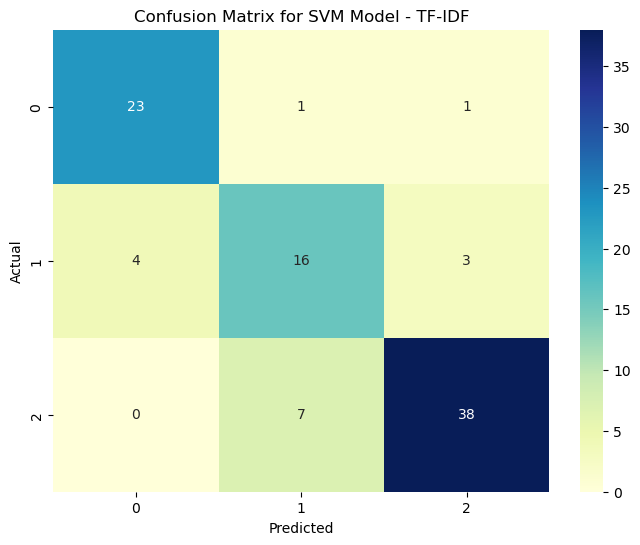

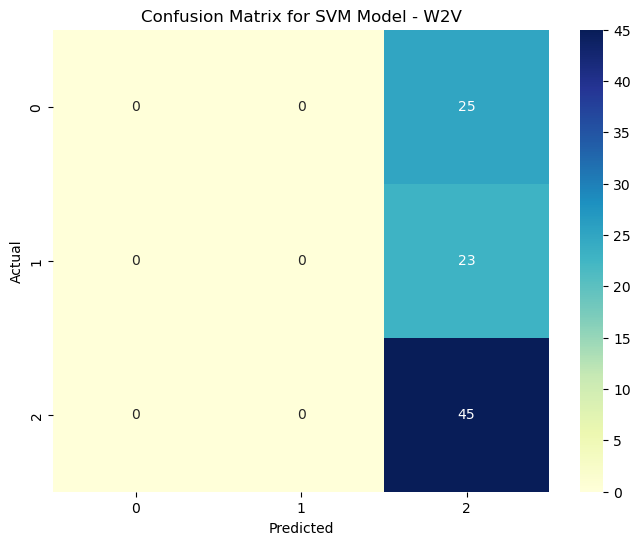

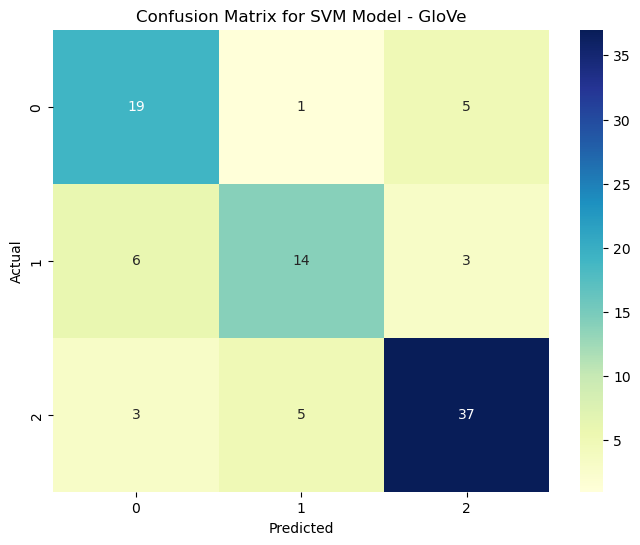

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_svm_tfidf = confusion_matrix(y_test, svm_predictions_tfidf)
cm_svm_w2v = confusion_matrix(y_test, svm_predictions_w2v)
cm_svm_glo = confusion_matrix(y_test, svm_predictions_glo)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model - TF-IDF')
plt.show()


# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_w2v, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model - W2V')
plt.show()

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model - GloVe')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Forest</p>

## finding the best params 

In [101]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
  'n_estimators': [100, 200, 300, 1000],  # Number of trees in the forest
  'max_depth': [40, 60, 80, 100],       # Maximum depth of individual trees
  'max_features': ['auto', 'sqrt', 'log2'] # Number of features considered at each split
}

# Create the RandomForestClassifier model
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search_tfidf_temp = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_w2v_temp   = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_w2v   = grid_search_w2v.best_params_
best_params_glo   = grid_search_glo.best_params_

print("Best Parameters for TD-IDF  : ", best_params_tfidf)
print("Best Parameters for W2V     : ", best_params_w2v)
print("Best Parameters for GloVe   : ", best_params_glo)


Best Parameters for TD-IDF  :  {'max_depth': 80, 'max_features': 'log2', 'n_estimators': 300}
Best Parameters for W2V     :  {'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 200}
Best Parameters for GloVe   :  {'max_depth': 100, 'max_features': 'log2', 'n_estimators': 100}


## model start here

In [102]:
# Initialize Random Forest Classifier
rf_classifier_tfidf = RandomForestClassifier(**best_params_tfidf)
rf_classifier_w2v   = RandomForestClassifier(**best_params_w2v)
rf_classifier_glo   = RandomForestClassifier(**best_params_glo)

# Fit the classifier on the training data
rf_classifier_tfidf.fit(x_train_tfidf, y_train)
rf_classifier_w2v.fit(x_train_w2v, y_train)
rf_classifier_glo.fit(x_train_glo, y_train)

# Predict on the testing data
rf_predictions_tfidf = rf_classifier_tfidf.predict(x_test_tfidf)
rf_predictions_w2v = rf_classifier_w2v.predict(x_test_w2v)
rf_predictions_glo = rf_classifier_glo.predict(x_test_glo)





In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics for SVM
accuracy_rf_tfidf  = accuracy_score(y_test, rf_predictions_tfidf)
precision_rf_tfidf = precision_score(y_test, rf_predictions_tfidf, average='micro')
recall_rf_tfidf    = recall_score(y_test, rf_predictions_tfidf, average='micro')
f1_rf_tfidf        = f1_score(y_test, rf_predictions_tfidf, average='micro')

accuracy_rf_w2v    = accuracy_score(y_test, rf_predictions_w2v)
precision_rf_w2v   = precision_score(y_test, rf_predictions_w2v, average='micro')
recall_rf_w2v      = recall_score(y_test, rf_predictions_w2v, average='micro')
f1_rf_w2v          = f1_score(y_test, rf_predictions_w2v, average='micro')

accuracy_rf_glo    = accuracy_score(y_test, rf_predictions_glo)
precision_rf_glo   = precision_score(y_test, rf_predictions_glo, average='micro')
recall_rf_glo      = recall_score(y_test, rf_predictions_glo, average='micro')
f1_rf_glo          = f1_score(y_test, rf_predictions_glo, average='micro')

print('Random Forest Metrics TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_rf_tfidf*100))
print('Precision : {:.2f} %'.format(precision_rf_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_rf_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_rf_tfidf*100))
print('')
print('Random Forest Metrics for W2v:')
print('Accuracy  : {:.2f} %'.format(accuracy_rf_w2v*100))
print('Precision : {:.2f} %'.format(precision_rf_w2v*100))
print('Recall    : {:.2f} %'.format(recall_rf_w2v*100))
print('F1 Score  : {:.2f} %'.format(f1_rf_w2v*100))
print('')
print('Random Forest Metrics for GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_rf_glo*100))
print('Precision : {:.2f} %'.format(precision_rf_glo*100))
print('Recall    : {:.2f} %'.format(recall_rf_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_rf_glo*100))


Random Forest Metrics TF-IDF:
Accuracy  : 80.65 %
Precision : 80.65 %
Recall    : 80.65 %
F1 Score  : 80.65 %

Random Forest Metrics for W2v:
Accuracy  : 32.26 %
Precision : 32.26 %
Recall    : 32.26 %
F1 Score  : 32.26 %

Random Forest Metrics for GloVe:
Accuracy  : 68.82 %
Precision : 68.82 %
Recall    : 68.82 %
F1 Score  : 68.82 %


## confusion martrix

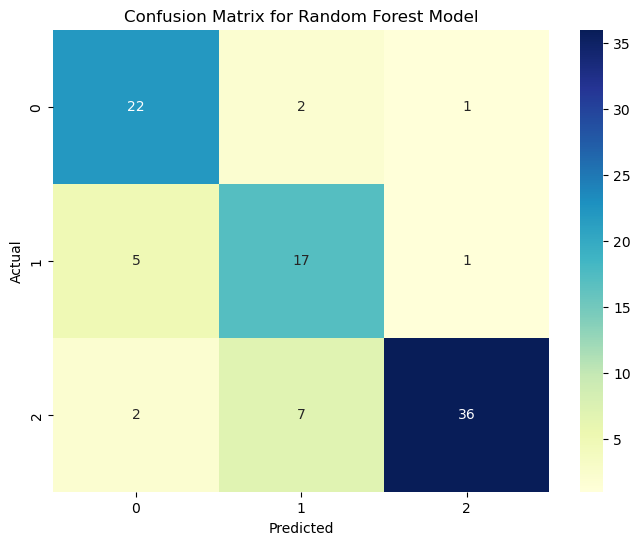

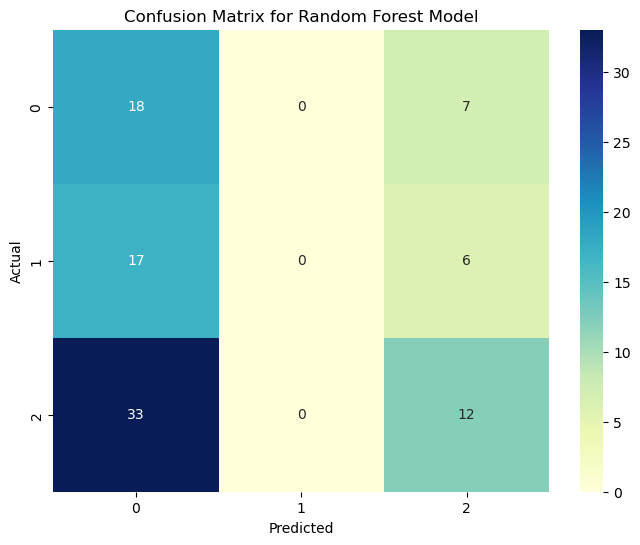

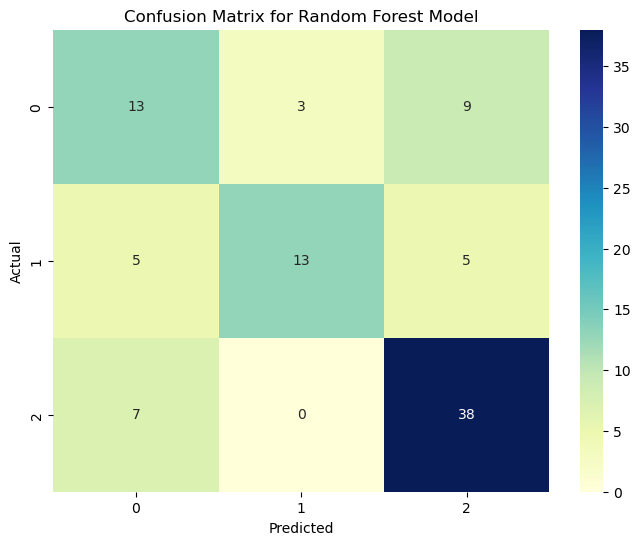

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for rf
cm_rf_tfidf = confusion_matrix(y_test, rf_predictions_tfidf)
cm_rf_w2v = confusion_matrix(y_test, rf_predictions_w2v)
cm_rf_glo = confusion_matrix(y_test, rf_predictions_glo)


# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_w2v, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Decision Tree</p>

## finding the best params 

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_tfidf_temp = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_w2v_temp   = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')


grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_w2v   = grid_search_w2v.best_params_
best_params_glo   = grid_search_glo.best_params_

print("Best Parameters for TD-IDF  : ", best_params_tfidf)
print("Best Parameters for W2V     : ", best_params_w2v)
print("Best Parameters for GloVe   : ", best_params_glo)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


## model start here

In [106]:
# Initialize Random Forest Classifier
dt_classifier_tfidf = DecisionTreeClassifier(**best_params_tfidf)
dt_classifier_w2v   = DecisionTreeClassifier(**best_params_w2v)
dt_classifier_glo   = DecisionTreeClassifier(**best_params_glo)

# Fit the classifier on the training data
dt_classifier_tfidf.fit(x_train_tfidf, y_train)
dt_classifier_w2v.fit(x_train_w2v, y_train)
dt_classifier_glo.fit(x_train_glo, y_train)

# Predict on the testing data
dt_predictions_tfidf = dt_classifier_tfidf.predict(x_test_tfidf)
dt_predictions_w2v   = dt_classifier_w2v.predict(x_test_w2v)
dt_predictions_glo   = dt_classifier_glo.predict(x_test_glo)



In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics for SVM
accuracy_dt_tfidf  = accuracy_score(y_test, dt_predictions_tfidf)
precision_dt_tfidf = precision_score(y_test, dt_predictions_tfidf, average='micro')
recall_dt_tfidf    = recall_score(y_test, dt_predictions_tfidf, average='micro')
f1_dt_tfidf        = f1_score(y_test, dt_predictions_tfidf, average='micro')

accuracy_dt_w2v  = accuracy_score(y_test, dt_predictions_w2v)
precision_dt_w2v = precision_score(y_test, dt_predictions_w2v, average='micro')
recall_dt_w2v    = recall_score(y_test, dt_predictions_w2v, average='micro')
f1_dt_w2v        = f1_score(y_test, dt_predictions_w2v, average='micro')

accuracy_dt_glo  = accuracy_score(y_test, dt_predictions_glo)
precision_dt_glo = precision_score(y_test, dt_predictions_glo, average='micro')
recall_dt_glo    = recall_score(y_test, dt_predictions_glo, average='micro')
f1_dt_glo        = f1_score(y_test, dt_predictions_glo, average='micro')

print('DT Model Metrics TF-IDF::')
print('Accuracy  : {:.2f} %'.format(accuracy_dt_tfidf*100))
print('Precision : {:.2f} %'.format(precision_dt_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_dt_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_dt_tfidf*100))
print('')
print('DT Model Metrics W2V:')
print('Accuracy  : {:.2f} %'.format(accuracy_dt_w2v*100))
print('Precision : {:.2f} %'.format(precision_dt_w2v*100))
print('Recall    : {:.2f} %'.format(recall_dt_w2v*100))
print('F1 Score  : {:.2f} %'.format(f1_dt_w2v*100))
print('')
print('DT Model Metrics GloVe::')
print('Accuracy  : {:.2f} %'.format(accuracy_dt_glo*100))
print('Precision : {:.2f} %'.format(precision_dt_glo*100))
print('Recall    : {:.2f} %'.format(recall_dt_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_dt_glo*100))


DT Model Metrics TF-IDF::
Accuracy  : 76.34 %
Precision : 76.34 %
Recall    : 76.34 %
F1 Score  : 76.34 %

DT Model Metrics W2V:
Accuracy  : 26.88 %
Precision : 26.88 %
Recall    : 26.88 %
F1 Score  : 26.88 %

DT Model Metrics GloVe::
Accuracy  : 49.46 %
Precision : 49.46 %
Recall    : 49.46 %
F1 Score  : 49.46 %


## confusion martrix

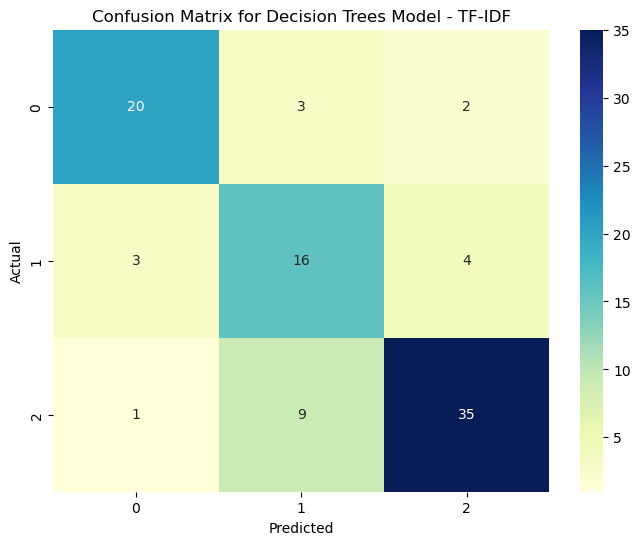

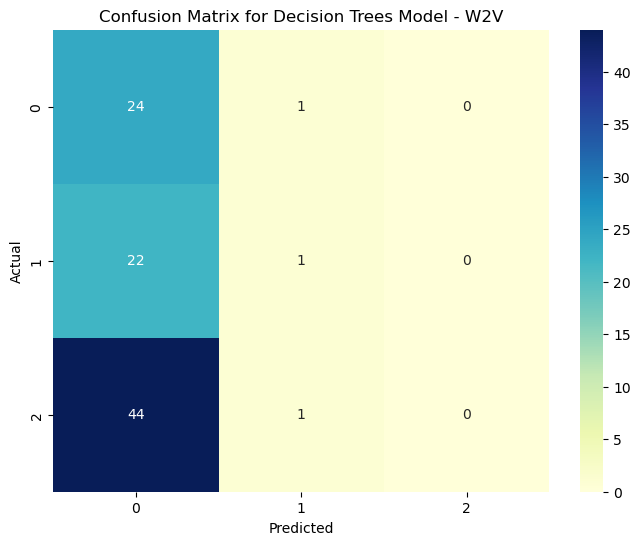

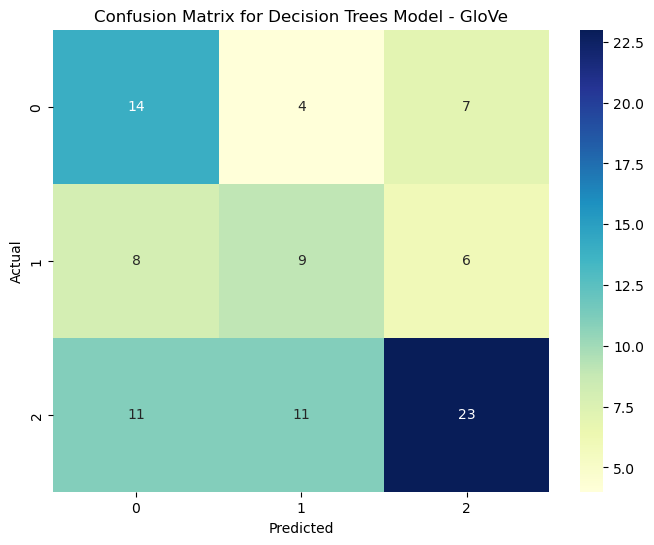

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_svm_tfidf = confusion_matrix(y_test, dt_predictions_tfidf)
cm_svm_w2v   = confusion_matrix(y_test, dt_predictions_w2v)
cm_svm_glo   = confusion_matrix(y_test, dt_predictions_glo)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees Model - TF-IDF')
plt.show()


# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_w2v, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees Model - W2V')
plt.show()


# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees Model - GloVe')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Logistic Regression Model</p>

## finding the best params

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'solver': ['liblinear', 'saga']  # Solver for optimization
}

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Perform grid search with cross-validation
grid_search_tfidf_temp = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search_w2v_temp   = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')


grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_w2v   = grid_search_w2v.best_params_
best_params_glo   = grid_search_glo.best_params_


print("Best Parameters for TF-IDF :", best_params_tfidf)
print("Best Parameters for W2V    :", best_params_w2v)
print("Best Parameters for GloVe  :", best_params_glo)


Best Parameters for TF-IDF : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Parameters for W2V    : {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Parameters for GloVe  : {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


## model start here

In [115]:
# Create a Logistic Regression model with the best parameters
logistic_regression_tfidf   = LogisticRegression(**best_params_tfidf)
logistic_regression_w2v     = LogisticRegression(**best_params_w2v)
logistic_regression_glo     = LogisticRegression(**best_params_glo)

# Train the best Logistic Regression model on your training data
logistic_regression_tfidf.fit(x_train_tfidf, y_train)
logistic_regression_w2v.fit(x_train_w2v, y_train)
logistic_regression_glo.fit(x_train_glo, y_train)

# Predict on the testing data
lr_predictions_tfidf = logistic_regression_tfidf.predict(x_test_tfidf)
lr_predictions_w2v   = logistic_regression_w2v.predict(x_test_w2v)
lr_predictions_glo   = logistic_regression_glo.predict(x_test_glo)

In [116]:
# Calculate performance metrics for SVM

accuracy_lr_tfidf  = accuracy_score(y_test, lr_predictions_tfidf)
precision_lr_tfidf = precision_score(y_test, lr_predictions_tfidf, average='micro')
recall_lr_tfidf    = recall_score(y_test, lr_predictions_tfidf, average='micro')
f1_lr_tfidf        = f1_score(y_test, lr_predictions_tfidf, average='micro')

accuracy_lr_w2v  = accuracy_score(y_test, lr_predictions_w2v)
precision_lr_w2v = precision_score(y_test, lr_predictions_w2v, average='micro')
recall_lr_w2v    = recall_score(y_test, lr_predictions_w2v, average='micro')
f1_lr_w2v        = f1_score(y_test, lr_predictions_w2v, average='micro')

accuracy_lr_glo  = accuracy_score(y_test, lr_predictions_glo)
precision_lr_glo = precision_score(y_test, lr_predictions_glo, average='micro')
recall_lr_glo    = recall_score(y_test, lr_predictions_glo, average='micro')
f1_lr_glo        = f1_score(y_test, lr_predictions_glo, average='micro')

print('Logistic Regression Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_lr_tfidf*100))
print('Precision : {:.2f} %'.format(precision_lr_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_lr_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_lr_tfidf*100))
print('')
print('Logistic Regression Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_lr_w2v*100))
print('Precision : {:.2f} %'.format(precision_lr_w2v*100))
print('Recall    : {:.2f} %'.format(recall_lr_w2v*100))
print('F1 Score  : {:.2f} %'.format(f1_lr_w2v*100))
print('')
print('Logistic Regression Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_lr_glo*100))
print('Precision : {:.2f} %'.format(precision_lr_glo*100))
print('Recall    : {:.2f} %'.format(recall_lr_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_lr_glo*100))

Logistic Regression Model Metrics - TF-IDF:
Accuracy  : 89.25 %
Precision : 89.25 %
Recall    : 89.25 %
F1 Score  : 89.25 %

Logistic Regression Model Metrics - TF-IDF:
Accuracy  : 45.16 %
Precision : 45.16 %
Recall    : 45.16 %
F1 Score  : 45.16 %

Logistic Regression Model Metrics - TF-IDF:
Accuracy  : 76.34 %
Precision : 76.34 %
Recall    : 76.34 %
F1 Score  : 76.34 %


## confusion martrix

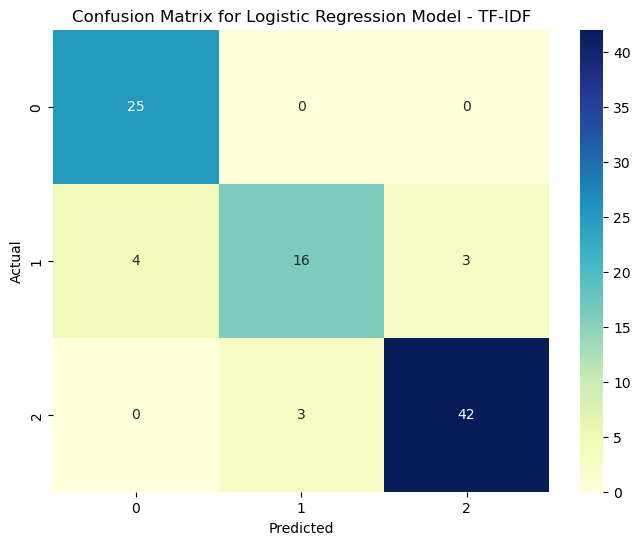

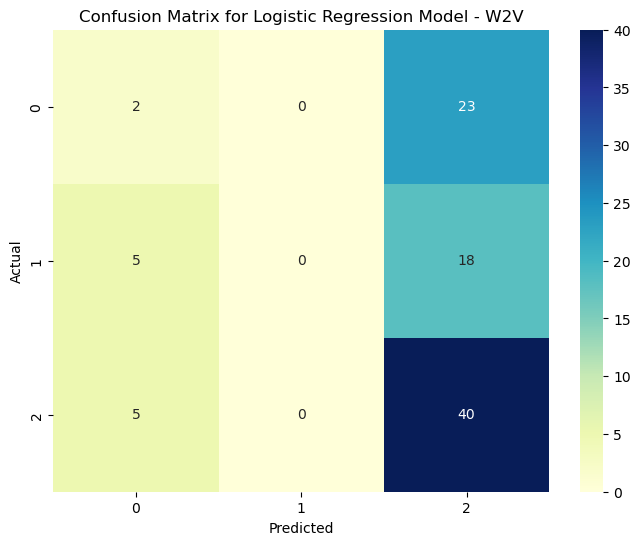

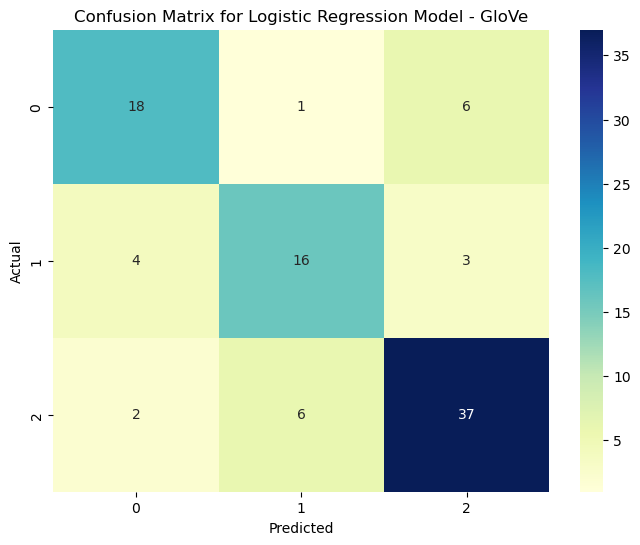

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_svm_tfidf = confusion_matrix(y_test, lr_predictions_tfidf)
cm_svm_w2v   = confusion_matrix(y_test, lr_predictions_w2v)
cm_svm_glo   = confusion_matrix(y_test, lr_predictions_glo)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model - TF-IDF')
plt.show()


# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_w2v, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model - W2V')
plt.show()


# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model - GloVe')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Naive Bayes</p>

In [124]:
def min_max_scaling(embeddings):
    min_vals = np.min(embeddings, axis=0)
    max_vals = np.max(embeddings, axis=0)
    normalized_embeddings = (embeddings - min_vals) / (max_vals - min_vals)
    return normalized_embeddings


x_train_w2v_norm = min_max_scaling(x_train_w2v)
x_train_glo_norm = min_max_scaling(x_train_glo)

x_test_w2v_norm = min_max_scaling(x_test_w2v)
x_test_glo_norm = min_max_scaling(x_test_glo)


## find the best parameters

In [122]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Instantiate Naive Bayes model
naive_bayes = MultinomialNB()

# Instantiate GridSearchCV
grid_search_tfidf_temp = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search_w2v_temp   = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v_norm, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo_norm, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_w2v   = grid_search_w2v.best_params_
best_params_glo   = grid_search_glo.best_params_


print("Best Parameters for TF-IDF :", best_params_tfidf)
print("Best Parameters for W2V    :", best_params_w2v)
print("Best Parameters for GloVe  :", best_params_glo)


Best Parameters for TF-IDF : {'alpha': 0.5}
Best Parameters for W2V    : {'alpha': 1.0}
Best Parameters for GloVe  : {'alpha': 1.0}


## Naive Bayes model start here

In [126]:
from sklearn.naive_bayes import MultinomialNB

# Create Naive Bayes model with the best parameters
nb_tfidf   = MultinomialNB(**best_params_tfidf)
nb_w2v     = MultinomialNB(**best_params_w2v)
nb_glo     = MultinomialNB(**best_params_glo)

# Train the best Logistic Regression model on your training data
nb_tfidf.fit(x_train_tfidf, y_train)
nb_w2v.fit(x_train_w2v_norm, y_train)
nb_glo.fit(x_train_glo_norm, y_train)

# Predict on the testing data
nb_predictions_tfidf = nb_tfidf.predict(x_test_tfidf)
nb_predictions_w2v   = nb_w2v.predict(x_test_w2v)
nb_predictions_glo   = nb_glo.predict(x_test_glo)

In [127]:

# Calculate performance metrics for Naive Bayes
accuracy_nb_tfidf   = accuracy_score(y_test, nb_predictions_tfidf)
precision_nb_tfidf  = precision_score(y_test, nb_predictions_tfidf, average='micro')
recall_nb_tfidf     = recall_score(y_test, nb_predictions_tfidf, average='micro')
f1_nb_tfidf         = f1_score(y_test, nb_predictions_tfidf, average='micro')

accuracy_nb_w2v   = accuracy_score(y_test, nb_predictions_w2v)
precision_nb_w2v  = precision_score(y_test, nb_predictions_w2v, average='micro')
recall_nb_w2v     = recall_score(y_test, nb_predictions_w2v, average='micro')
f1_nb_w2v         = f1_score(y_test, nb_predictions_w2v, average='micro')

accuracy_nb_glo   = accuracy_score(y_test, nb_predictions_glo )
precision_nb_glo  = precision_score(y_test, nb_predictions_glo , average='micro')
recall_nb_glo     = recall_score(y_test, nb_predictions_glo , average='micro')
f1_nb_glo         = f1_score(y_test, nb_predictions_glo , average='micro')

print('Naive Bayes Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_nb_tfidf * 100))
print('Precision : {:.2f} %'.format(precision_nb_tfidf * 100))
print('Recall    : {:.2f} %'.format(recall_nb_tfidf * 100))
print('F1 Score  : {:.2f} %'.format(f1_nb_tfidf * 100))
print('')
print('Naive Bayes Model Metrics - W2V:')
print('Accuracy  : {:.2f} %'.format(accuracy_nb_w2v * 100))
print('Precision : {:.2f} %'.format(precision_nb_w2v * 100))
print('Recall    : {:.2f} %'.format(recall_nb_w2v * 100))
print('F1 Score  : {:.2f} %'.format(f1_nb_w2v * 100))
print('')
print('Naive Bayes Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_nb_glo  * 100))
print('Precision : {:.2f} %'.format(precision_nb_glo  * 100))
print('Recall    : {:.2f} %'.format(recall_nb_glo  * 100))
print('F1 Score  : {:.2f} %'.format(f1_nb_glo  * 100))

Naive Bayes Model Metrics - TF-IDF:
Accuracy  : 82.80 %
Precision : 82.80 %
Recall    : 82.80 %
F1 Score  : 82.80 %

Naive Bayes Model Metrics - W2V:
Accuracy  : 48.39 %
Precision : 48.39 %
Recall    : 48.39 %
F1 Score  : 48.39 %

Naive Bayes Model Metrics - GloVe:
Accuracy  : 30.11 %
Precision : 30.11 %
Recall    : 30.11 %
F1 Score  : 30.11 %


## confusion martrix

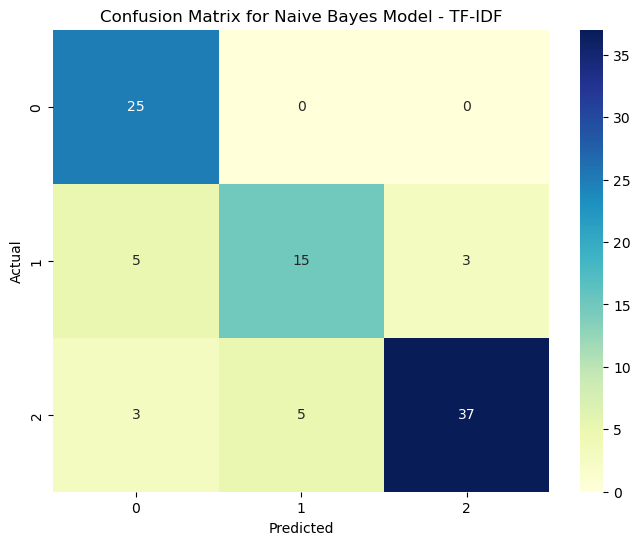

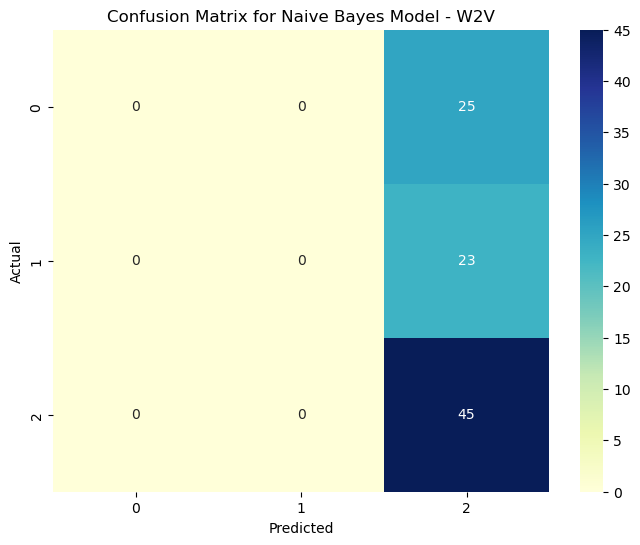

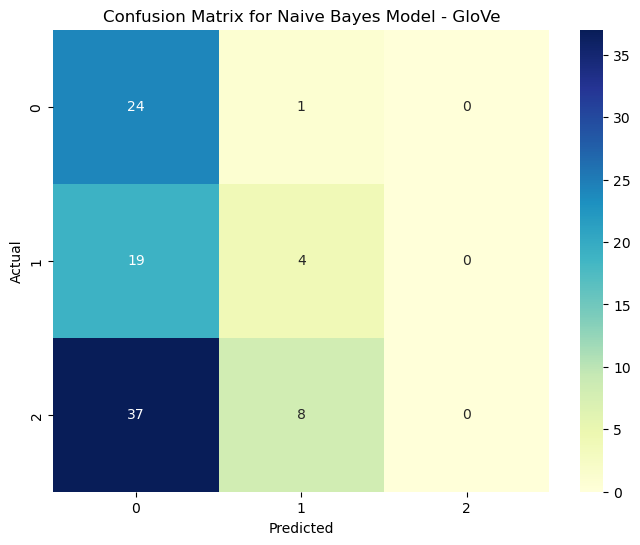

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_nb_tfidf = confusion_matrix(y_test, nb_predictions_tfidf)
cm_nb_w2v   = confusion_matrix(y_test, nb_predictions_w2v)
cm_nb_glo   = confusion_matrix(y_test, nb_predictions_glo)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model - TF-IDF')
plt.show()

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_w2v, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model - W2V')
plt.show()

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model - GloVe')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">K-NN</p>

## finding the best params

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create k-NN classifier
knn = KNeighborsClassifier()

grid_search_tfidf_temp = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_w2v_temp   = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_w2v   = grid_search_w2v.best_params_
best_params_glo   = grid_search_glo.best_params_


print("Best Parameters for TF-IDF :", best_params_tfidf)
print("Best Parameters for W2V    :", best_params_w2v)
print("Best Parameters for GloVe  :", best_params_glo)

Best Parameters for TF-IDF : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Parameters for W2V    : {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Parameters for GloVe  : {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


In [131]:
# Use the best model to make predictions
knn_tfidf   = KNeighborsClassifier(**best_params_tfidf)
knn_w2v     = KNeighborsClassifier(**best_params_w2v)
knn_glo     = KNeighborsClassifier(**best_params_glo)

knn_tfidf.fit(x_train_tfidf, y_train)
knn_w2v.fit(x_train_w2v, y_train)
knn_glo.fit(x_train_glo, y_train)

knn_predictions_tfidf = nb_tfidf.predict(x_test_tfidf)
knn_predictions_w2v   = nb_w2v.predict(x_test_w2v)
knn_predictions_glo   = nb_glo.predict(x_test_glo)


In [133]:
# Calculate performance metrics for SVM
accuracy_knn_tfidf  = accuracy_score(y_test, knn_predictions_tfidf)
precision_knn_tfidf = precision_score(y_test, knn_predictions_tfidf, average='micro')
recall_knn_tfidf    = recall_score(y_test, knn_predictions_tfidf, average='micro')
f1_knn_tfidf         = f1_score(y_test, knn_predictions_tfidf, average='micro')

accuracy_knn_w2v  = accuracy_score(y_test, knn_predictions_w2v)
precision_knn_w2v = precision_score(y_test, knn_predictions_w2v, average='micro')
recall_knn_w2v    = recall_score(y_test, knn_predictions_w2v, average='micro')
f1_knn_w2v        = f1_score(y_test, knn_predictions_w2v, average='micro')

accuracy_knn_glo = accuracy_score(y_test, knn_predictions_glo)
precision_knn_glo = precision_score(y_test, knn_predictions_glo, average='micro')
recall_knn_glo = recall_score(y_test, knn_predictions_glo, average='micro')
f1_knn_glo = f1_score(y_test, knn_predictions_glo, average='micro')

print('KNN Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_knn_tfidf * 100))
print('Precision : {:.2f} %'.format(precision_knn_tfidf * 100))
print('Recall    : {:.2f} %'.format(recall_knn_tfidf * 100))
print('F1 Score  : {:.2f} %'.format(f1_knn_tfidf * 100))
print('')
print('KNN Model Metrics - W2V:')
print('Accuracy  : {:.2f} %'.format(accuracy_knn_w2v * 100))
print('Precision : {:.2f} %'.format(precision_knn_w2v * 100))
print('Recall    : {:.2f} %'.format(recall_knn_w2v * 100))
print('F1 Score  : {:.2f} %'.format(f1_knn_w2v * 100))
print('')
print('KNN Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_knn_glo * 100))
print('Precision : {:.2f} %'.format(precision_knn_glo * 100))
print('Recall    : {:.2f} %'.format(recall_knn_glo * 100))
print('F1 Score  : {:.2f} %'.format(f1_knn_glo * 100))

KNN Model Metrics - TF-IDF:
Accuracy  : 82.80 %
Precision : 82.80 %
Recall    : 82.80 %
F1 Score  : 82.80 %

KNN Model Metrics - W2V:
Accuracy  : 48.39 %
Precision : 48.39 %
Recall    : 48.39 %
F1 Score  : 48.39 %

KNN Model Metrics - GloVe:
Accuracy  : 30.11 %
Precision : 30.11 %
Recall    : 30.11 %
F1 Score  : 30.11 %


## confusion martrix

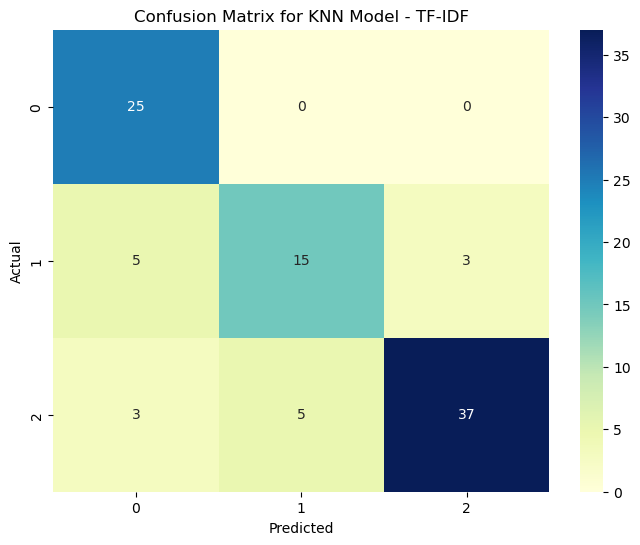

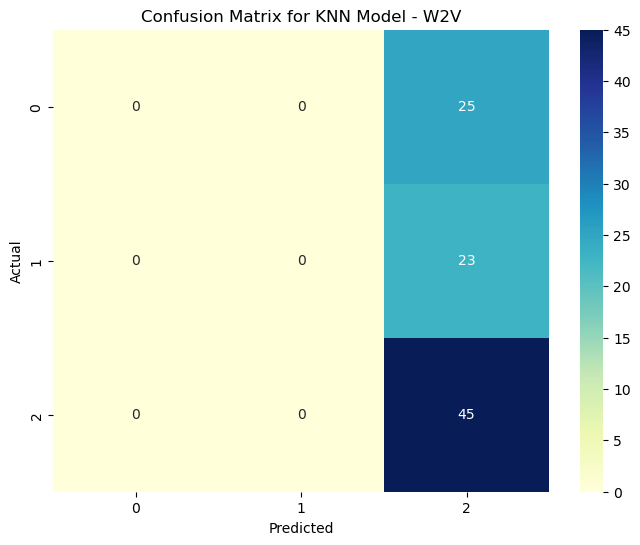

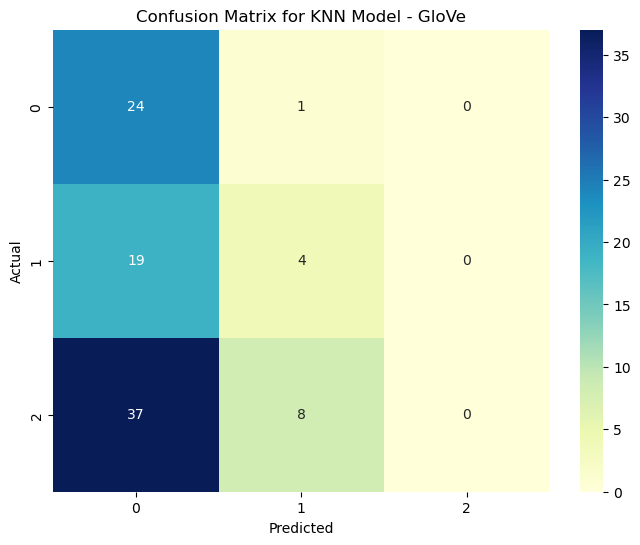

In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_nb_tfidf = confusion_matrix(y_test, knn_predictions_tfidf)
cm_nb_w2v = confusion_matrix(y_test, knn_predictions_w2v)
cm_nb_glo = confusion_matrix(y_test, knn_predictions_glo)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model - TF-IDF')
plt.show()
                             
# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_w2v, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model - W2V')
plt.show()
                             
# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model - GloVe')
plt.show()                            

## comparision

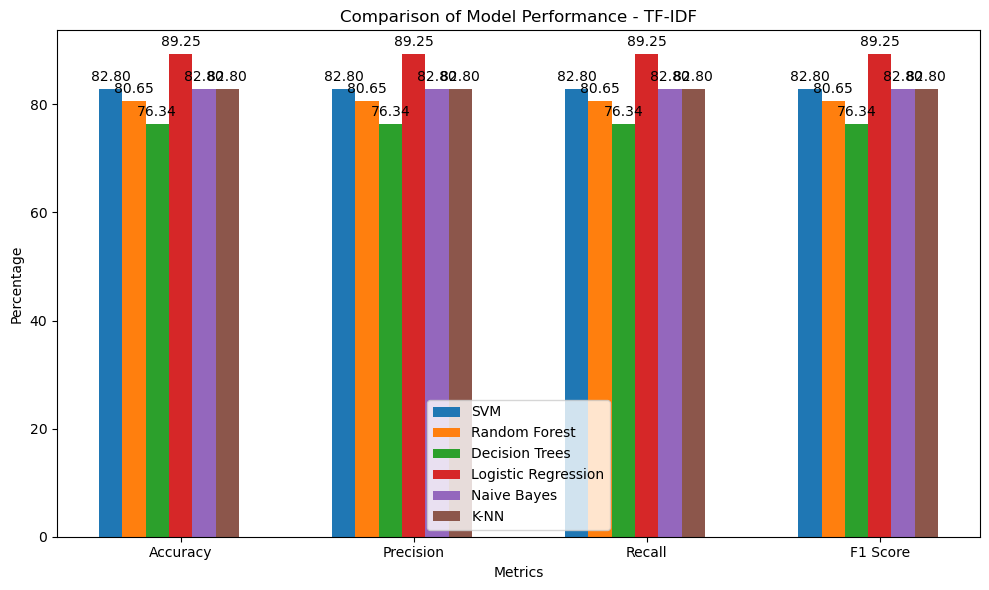

In [143]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_ = [accuracy_svm_tfidf * 100, precision_svm_tfidf * 100, recall_svm_tfidf * 100, f1_svm_tfidf * 100]
rf_ = [accuracy_rf_tfidf * 100, precision_rf_tfidf * 100, recall_rf_tfidf * 100, f1_rf_tfidf * 100]
dt_ = [accuracy_dt_tfidf * 100, precision_dt_tfidf * 100, recall_dt_tfidf * 100, f1_dt_tfidf * 100]
lr_ = [accuracy_lr_tfidf * 100, precision_lr_tfidf * 100, recall_lr_tfidf * 100, f1_lr_tfidf * 100]
nb_ = [accuracy_nb_tfidf * 100, precision_nb_tfidf * 100, recall_nb_tfidf * 100, f1_nb_tfidf * 100]
knn_ = [accuracy_knn_tfidf * 100, precision_knn_tfidf * 100, recall_knn_tfidf * 100, f1_knn_tfidf * 100]

# Bar width and positions
X_axis = np.arange(len(X))
bar_width = 0.1
bar_positions = [X_axis - 0.3, X_axis - 0.2, X_axis - 0.1, X_axis, X_axis + 0.1, X_axis + 0.2]

# Plotting
plt.figure(figsize=(10, 6))
for i, (model, values) in enumerate(zip(['SVM', 'Random Forest', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'K-NN'],
                                         [svm_, rf_, dt_, lr_, nb_, knn_])):
    plt.bar(bar_positions[i], values, bar_width, label=model)
    for x, y in zip(bar_positions[i], values):
        plt.text(x, y + 1, '{:.2f}'.format(y), ha='center', va='bottom')

plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("Percentage")
plt.title("Comparison of Model Performance - TF-IDF")
plt.legend()
plt.tight_layout()
plt.show()



# <p style="padding:10px;background-color:gold;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:300">Unsupervised Learning</p>

## use brain

In [323]:
from itertools import permutations

# Define the numbers
numbers = [2, 1, 0]

# Generate all permutations
perms = permutations(numbers)

# Print the permutations
for perm in perms:
    print(perm)

(2, 1, 0)
(2, 0, 1)
(1, 2, 0)
(1, 0, 2)
(0, 2, 1)
(0, 1, 2)


In [292]:
# try all combination of 2,1,0 then find the highest score with confusion matrix
def SR_combination_1_(rating):
    if rating == 'Negative':
        return 2
    elif rating ==  'Neutral':
        return 1
    elif rating ==  'Positive':
        return 0
    else:
        return (-1)  

In [293]:
def SR_combination_2_(rating):
    if rating == 'Negative':
        return 2
    elif rating == 'Neutral':
        return 0
    elif rating == 'Positive':
        return 1
    else:
        return (-1) 

In [294]:
def SR_combination_3_(rating):
    if rating == 'Negative':
        return 1
    elif rating == 'Neutral':
        return 2
    elif rating == 'Positive':
        return 0
    else:
        return (-1) 

In [295]:
def SR_combination_4_(rating):
    if rating == 'Negative':
        return 1
    elif rating == 'Neutral':
        return 0
    elif rating == 'Positive':
        return 2
    else:
        return (-1) 

In [296]:
def SR_combination_5_(rating):
    if rating == 'Negative':
        return 0
    elif rating == 'Neutral':
        return 2
    elif rating == 'Positive':
        return 1
    else:
        return (-1) 

In [297]:
def SR_combination_6_(rating):
    if rating == 'Negative':
        return 0
    elif rating == 'Neutral':
        return 1
    elif rating == 'Positive':
        return 2
    else:
        return (-1)  

In [298]:
finalData['SR_combination_1'] = finalData['Sentiment_Rating'].apply(SR_combination_1_)
finalData['SR_combination_2'] = finalData['Sentiment_Rating'].apply(SR_combination_2_)
finalData['SR_combination_3'] = finalData['Sentiment_Rating'].apply(SR_combination_3_)
finalData['SR_combination_4'] = finalData['Sentiment_Rating'].apply(SR_combination_4_)
finalData['SR_combination_5'] = finalData['Sentiment_Rating'].apply(SR_combination_5_)
finalData['SR_combination_6'] = finalData['Sentiment_Rating'].apply(SR_combination_6_)

In [299]:
finalData

ContractionReview Sentiment_Rating  \
0    baju kurta sampai dalam ada baik tapi tak ada ...          Neutral   
1    sizing tak accurate langsung aku rasa macam ba...         Negative   
2    baju kurta aku dah koyak belum pakai memang ta...         Negative   
3    delivery laju kain cantik thanks seller masih ...         Positive   
4    baju selamat darat kain cantik dan sedap di pa...         Positive   
..                                                 ...              ...   
457  pada baju ada warna merah cuba basuh masih x h...          Neutral   
458  colour a bit different from the picture and mo...         Negative   
459  warna nude kita mintak warna lain yg smpai lpa...         Negative   
460                        tidak ikut saiz yg saya nak         Positive   
461                           ukur tak sama saiz besar         Negative   

     SR_combination_1  SR_combination_2  SR_combination_3  SR_combination_4  \
0                   1                 0                 2                 0   
1                   2                 2                 1                 1   
2                   2                 2                 1                 1   
3                   0                 1                 0                 2   
4                   0                 1                 0                 2   
..                ...               ...               ...               ...   
457                 1                 0                 2                 0   
458                 2                 2                 1                 1   
459                 2                 2                 1                 1   
460                 0                 1                 0                 2   
461                 2                 2                 1                 1   

     SR_combination_5  SR_combination_6  knn_cluster_label  
0                   2                 1                  2  
1                   0                 0                  2  
2                   0                 0                  2  
3                   1                 2                  0  
4                   1                 2                  0  
..                ...               ...                ...  
457                 2                 1                  0  
458                 0                 0                  0  
459                 0                 0                  0  
460                 1                 2                  0  
461                 0                 0                  0  

[462 rows x 9 columns]

## application of PCA

In [300]:
text_data = finalData['ContractionReview']

In [301]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
tfidf_matrix_dense = tfidf_matrix.toarray()

In [302]:
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_dense)

## Elbow Method

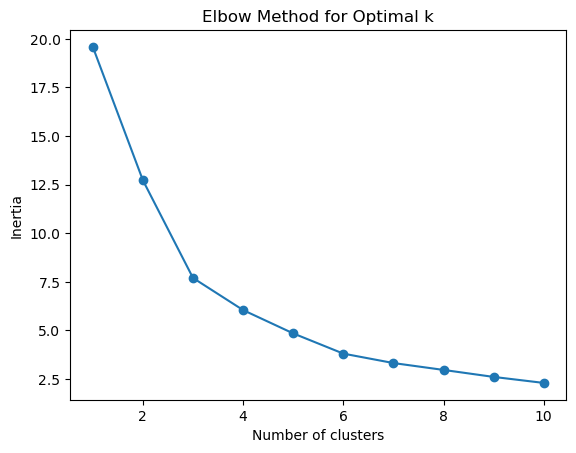

In [303]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X' is your data and 'pca_result' is the transformed data using PCA
inertia = []
k_max = 10  # Maximum number of clusters to consider

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, k_max + 1), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.show()


Silhouette Score: 0.02577081340290423


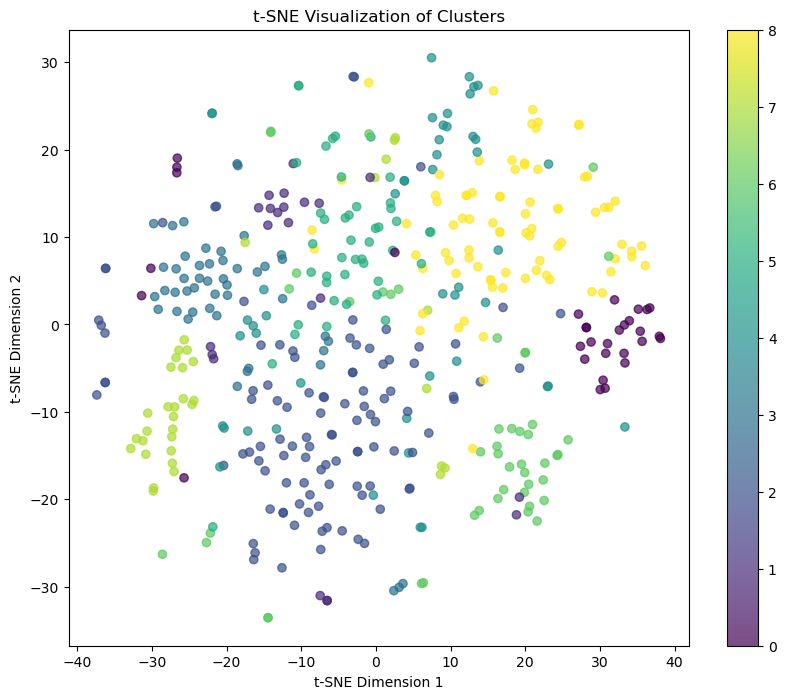

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Load the dataset
# Assume 'data' is a pandas DataFrame with columns 'text' and 'sentiment'

# Preprocess text data (e.g., remove punctuation, convert to lowercase)

# Extract features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(finalData['ContractionReview'])

# Determine the optimal number of clusters (K)
silhouette_scores = []
for k in range(2, 11):  # Try different values of K
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to get the actual K

# Train the K-means model with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Assign sentiment labels based on cluster centroids
cluster_centers = kmeans.cluster_centers_
sentiment_map = {i: 'Positive' if cluster_centers[i][0] >= 0 else 'Negative' for i in range(optimal_k)}
predicted_sentiments = [sentiment_map[label] for label in cluster_labels]

# Add predicted sentiments to the DataFrame
finalData['predicted_sentiment'] = predicted_sentiments

# Evaluate the quality of the clusters (optional)
silhouette_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_score}")

# Visualize the clusters (optional)
# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42, init='random')
X_tsne = tsne.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
# Analyze the clusters and interpret the results


## K-means




In [346]:
from sklearn.cluster import KMeans

# Assuming 'X' is your data
# Initialize KMeans with the number of clusters you want
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the data
kmeans.fit(pca_result)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Print the cluster labels for each data point
print("Cluster Labels:")
print(cluster_labels)


Cluster Centers:
[[ 0.03830652 -0.10519363]
 [ 0.16577201  0.14992919]
 [-0.16173934  0.05831503]]
Cluster Labels:
[2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 1 0
 0 2 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 0
 1 2 0 0 0 0 1 0 2 2 1 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 0 2 0 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 2 2 2 2 2 2 1 2 2 1 0
 2 2 2 1 1 1 2 1 0 1 0 1 0 0 2 2 2 1 0 1 2 0 0 1 0 1 0 2 2 1 0 1 0 2 2 0 2
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2

## scatter plot

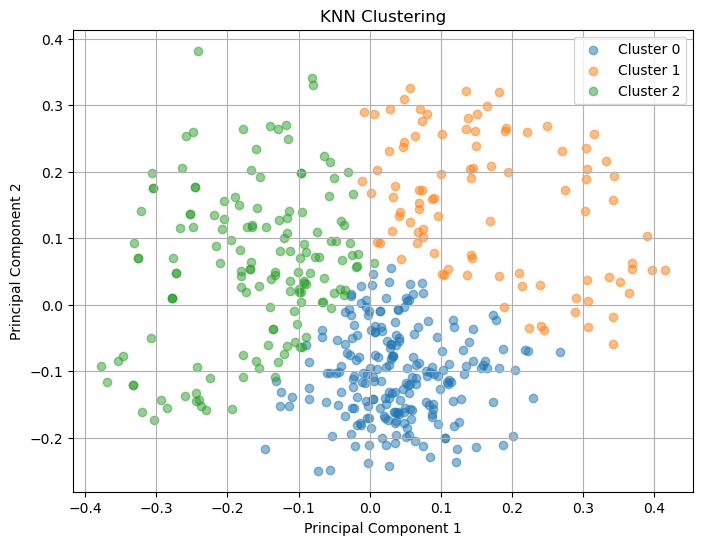

In [338]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(kmeans.labels_):
    cluster_points = pca_result[kmeans.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('KNN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [306]:
# save as a column
finalData['knn_cluster_label'] = kmeans.labels_

## interpret the result

SR Combination 1 :
Accuracy  : 69.91 %
Precision : 67.42 %
Recall    : 66.77 %
F1-score  : 66.90 %

SR Combination 2 :
Accuracy  : 38.31 %
Precision : 41.53 %
Recall    : 39.94 %
F1-score  : 38.96 %

SR Combination 3 :
Accuracy  : 43.72 %
Precision : 35.26 %
Recall    : 38.33 %
F1-score  : 36.44 %

SR Combination 4 :
Accuracy  : 10.61 %
Precision : 10.09 %
Recall    : 12.82 %
F1-score  : 10.58 %

SR Combination 5 :
Accuracy  : 19.48 %
Precision : 22.49 %
Recall    : 20.41 %
F1-score  : 20.06 %

SR Combination 6 :
Accuracy  : 17.97 %
Precision : 23.21 %
Recall    : 21.73 %
F1-score  : 22.14 %

The highest accuracy is SR combination 1


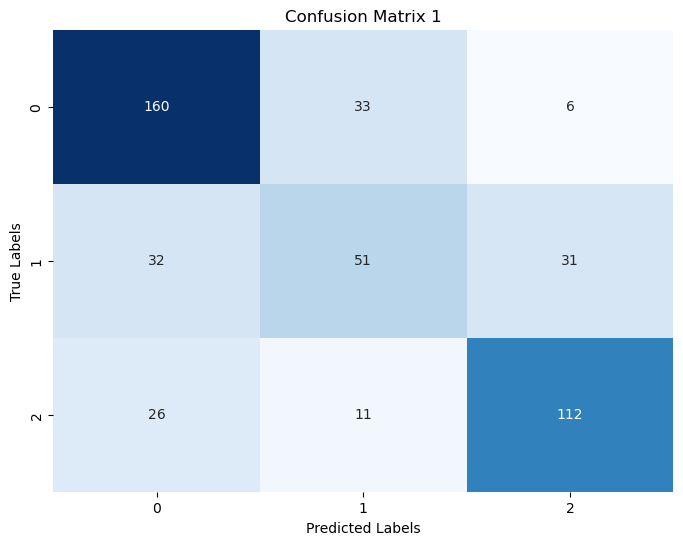

In [322]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



temp =0
# Create confusion matrix
for i in range(1,7):
    
    y_actual = finalData['SR_combination_' + str(i)]
    y_predict = finalData['knn_cluster_label']

    cm = confusion_matrix(y_actual, y_predict)
    conf_matrix = np.array(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_actual, y_predict)

    # Calculate precision
    precision = precision_score(y_actual, y_predict, average='macro')

    # Calculate recall
    recall = recall_score(y_actual, y_predict, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_actual, y_predict, average='macro')

    print(f"SR Combination {str(i)} :")
    print('Accuracy  : {:.2f} %'.format(accuracy * 100))
    print('Precision : {:.2f} %'.format(precision * 100))
    print('Recall    : {:.2f} %'.format(recall * 100))
    print('F1-score  : {:.2f} %'.format(f1 * 100))
    print("")
    
    if(temp < accuracy):
        temp = accuracy
        temp_cm = cm
        temp_noc = i
    
    
 #Plot confusion matrix
print('===========================================================================')
print('The highest accuracy is SR combination ' + str(temp_noc))
plt.figure(figsize=(8, 6))
sns.heatmap(temp_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix '  + str(temp_noc) )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Agglomerative

In [328]:
from sklearn.cluster import AgglomerativeClustering

# Define the number of clusters (optional, you can also let the model determine the optimal number of clusters)
n_clusters = 3

# Initialize the Agglomerative clustering model
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to your data
agg_clustering.fit(pca_result)



AgglomerativeClustering(n_clusters=3)

In [330]:
# Get cluster labels
cluster_labels = agg_clustering.labels_


# Print the cluster labels for each data point
print("Cluster Labels:")
print(agg_cluster_labels)


Cluster Labels:
[2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 2 1 0
 1 2 0 0 2 0 1 0 0 0 1 1 2 0 0 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2 2 2 0 2 2 2 0
 0 0 2 0 0 2 2 2 2 2 2 1 0 2 0 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 2 2 0 2 1 2 2 0 0 2 2 2 2 0 2 2 1 1 1 1 1 2 1 0 2 0 2 2 2 1 0 2 1 0
 2 2 2 1 1 1 2 1 0 1 0 1 0 0 2 0 2 1 1 1 2 1 0 1 0 1 0 2 0 1 1 2 0 0 2 0 2
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 2 0 0 2 0 0 2 2 2 0 1 0 0 2 0 0 0 2 0 0 2 0 0 2 2 0 0 2 2 0 2 0 2 0 2 0
 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0]


## scatter plot

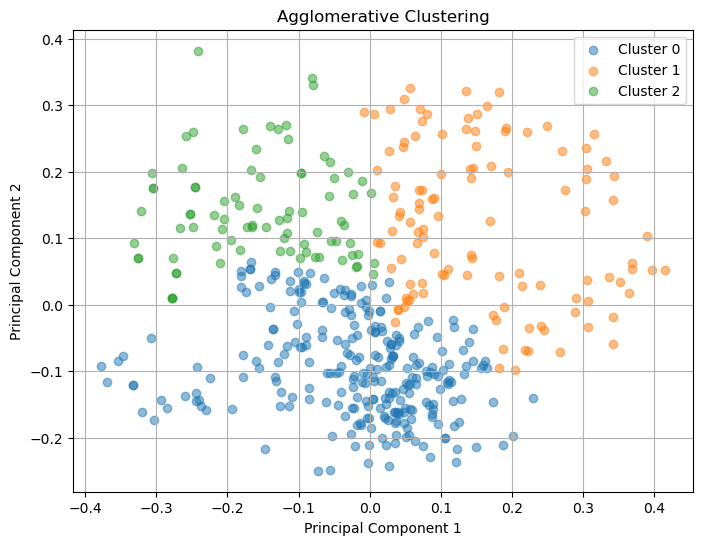

In [337]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(agg_clustering.labels_):
    cluster_points = pca_result[agg_clustering.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [331]:
# save as a column
finalData['aggg_cluster_label'] = agg_clustering.labels_

## interpret the result

SR Combination 1 :
Accuracy  : 55.19 %
Precision : 55.41 %
Recall    : 52.31 %
F1-score  : 52.14 %

SR Combination 2 :
Accuracy  : 28.79 %
Precision : 38.71 %
Recall    : 29.63 %
F1-score  : 30.94 %

SR Combination 3 :
Accuracy  : 41.13 %
Precision : 33.48 %
Recall    : 35.92 %
F1-score  : 33.98 %

SR Combination 4 :
Accuracy  : 11.90 %
Precision : 10.81 %
Recall    : 14.43 %
F1-score  : 11.15 %

SR Combination 5 :
Accuracy  : 32.90 %
Precision : 33.78 %
Recall    : 33.26 %
F1-score  : 31.41 %

SR Combination 6 :
Accuracy  : 30.09 %
Precision : 27.81 %
Recall    : 34.46 %
F1-score  : 29.79 %

The highest accuracy is SR combination 1


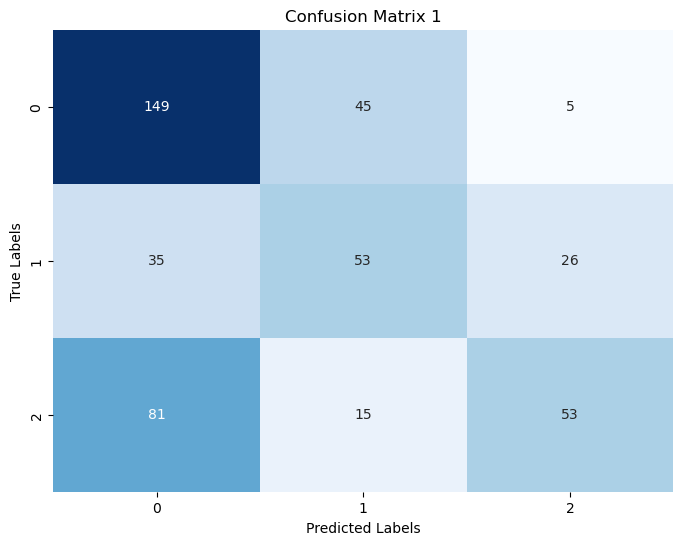

In [340]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



temp =0
# Create confusion matrix
for i in range(1,7):
    
    y_actual = finalData['SR_combination_' + str(i)]
    y_predict = finalData['aggg_cluster_label']

    cm = confusion_matrix(y_actual, y_predict)
    conf_matrix = np.array(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_actual, y_predict)

    # Calculate precision
    precision = precision_score(y_actual, y_predict, average='macro')

    # Calculate recall
    recall = recall_score(y_actual, y_predict, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_actual, y_predict, average='macro')

    print(f"SR Combination {str(i)} :")
    print('Accuracy  : {:.2f} %'.format(accuracy * 100))
    print('Precision : {:.2f} %'.format(precision * 100))
    print('Recall    : {:.2f} %'.format(recall * 100))
    print('F1-score  : {:.2f} %'.format(f1 * 100))
    print("")
    
    if(temp < accuracy):
        temp = accuracy
        temp_cm = cm
        temp_noc = i
    
    
 #Plot confusion matrix
print('===========================================================================')
print('The highest accuracy is SR combination ' + str(temp_noc))
plt.figure(figsize=(8, 6))
sns.heatmap(temp_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix '  + str(temp_noc) )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Spectral

In [341]:
from sklearn.cluster import SpectralClustering

# Create Spectral clustering model
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed

# Fit the model to your data
spectral_clustering.fit(pca_result)

# Get the cluster labels
cluster_labels = spectral_clustering.labels_
# Print the cluster labels for each data point
print("Cluster Labels:")
print(agg_cluster_labels)

Cluster Labels:
[2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 2 1 0
 1 2 0 0 2 0 1 0 0 0 1 1 2 0 0 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2 2 2 0 2 2 2 0
 0 0 2 0 0 2 2 2 2 2 2 1 0 2 0 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 2 2 0 2 1 2 2 0 0 2 2 2 2 0 2 2 1 1 1 1 1 2 1 0 2 0 2 2 2 1 0 2 1 0
 2 2 2 1 1 1 2 1 0 1 0 1 0 0 2 0 2 1 1 1 2 1 0 1 0 1 0 2 0 1 1 2 0 0 2 0 2
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 2 0 0 2 0 0 2 2 2 0 1 0 0 2 0 0 0 2 0 0 2 0 0 2 2 0 0 2 2 0 2 0 2 0 2 0
 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0]


## scatter plot

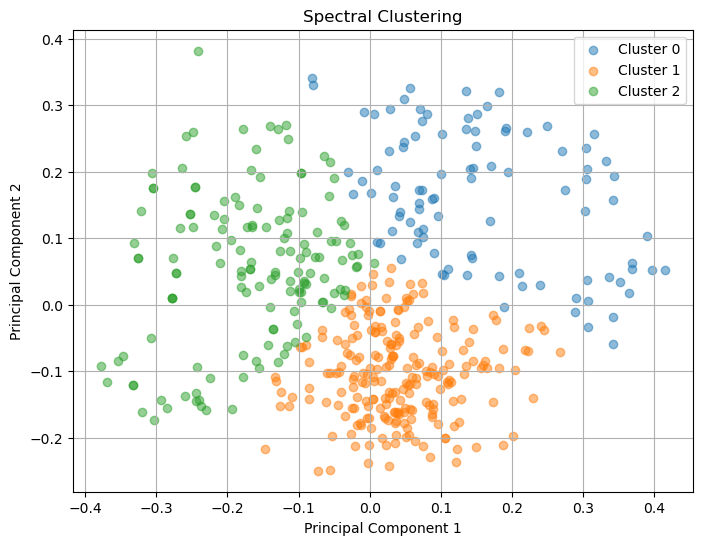

In [342]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(spectral_clustering.labels_):
    cluster_points = pca_result[spectral_clustering.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('Spectral Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [343]:
# save as a column
finalData['spec_cluster_label'] = spectral_clustering.labels_

## interpret the result

SR Combination 1 :
Accuracy  : 37.01 %
Precision : 40.77 %
Recall    : 38.77 %
F1-score  : 38.06 %

SR Combination 2 :
Accuracy  : 70.78 %
Precision : 68.94 %
Recall    : 67.77 %
F1-score  : 68.12 %

SR Combination 3 :
Accuracy  : 18.61 %
Precision : 21.07 %
Recall    : 19.41 %
F1-score  : 18.99 %

SR Combination 4 :
Accuracy  : 19.48 %
Precision : 24.82 %
Recall    : 23.57 %
F1-score  : 23.82 %

SR Combination 5 :
Accuracy  : 43.51 %
Precision : 34.41 %
Recall    : 37.66 %
F1-score  : 35.71 %

SR Combination 6 :
Accuracy  : 10.61 %
Precision : 9.99 %
Recall    : 12.82 %
F1-score  : 10.48 %

The highest accuracy is SR combination 2


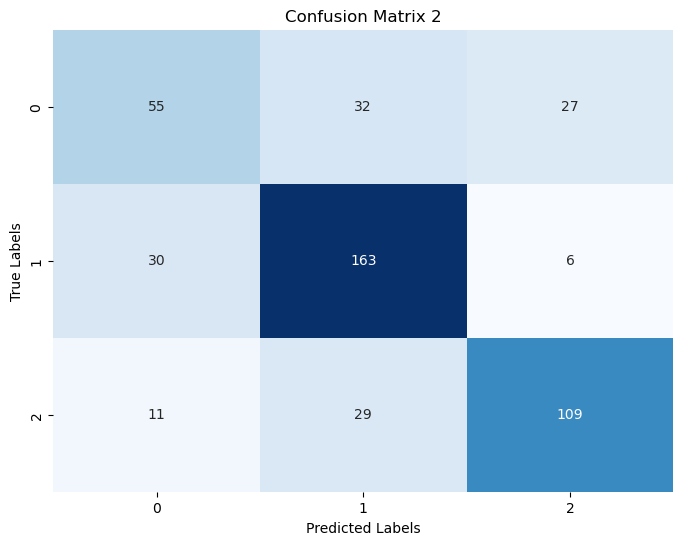

In [345]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



temp =0
# Create confusion matrix
for i in range(1,7):
    
    y_actual = finalData['SR_combination_' + str(i)]
    y_predict = finalData['spec_cluster_label']

    cm = confusion_matrix(y_actual, y_predict)
    conf_matrix = np.array(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_actual, y_predict)

    # Calculate precision
    precision = precision_score(y_actual, y_predict, average='macro')

    # Calculate recall
    recall = recall_score(y_actual, y_predict, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_actual, y_predict, average='macro')

    print(f"SR Combination {str(i)} :")
    print('Accuracy  : {:.2f} %'.format(accuracy * 100))
    print('Precision : {:.2f} %'.format(precision * 100))
    print('Recall    : {:.2f} %'.format(recall * 100))
    print('F1-score  : {:.2f} %'.format(f1 * 100))
    print("")
    
    if(temp < accuracy):
        temp = accuracy
        temp_cm = cm
        temp_noc = i
    
    
 #Plot confusion matrix
print('===========================================================================')
print('The highest accuracy is SR combination ' + str(temp_noc))
plt.figure(figsize=(8, 6))
sns.heatmap(temp_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix '  + str(temp_noc) )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Sentiment Analysis</p>

##### After Model Training, Testing and Evaluation, appropriate sentimer analysis model that effectively handle the Sentiment Reviews & Ratings is --- with highest accuracy of --- %.